<a href="https://colab.research.google.com/github/tran-linh41214/Machine-Learning/blob/main/Tr%E1%BA%A7n_Di%E1%BB%87u_Linh_ML_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# **DATA PREPARATION**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/churn_prediction.csv')

#Taking a copy of the data
OnlineRetail = df.copy()

In [4]:
# Display basic information and preview the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,52869,0,20.0,Mobile Phone,3,7.0,E wallet,Female,4.0,4,Fashion,5,Married,3,0,26.0,5.0,16.0,NaN,230
1,52942,0,13.0,Computer,1,9.0,Cash on Delivery,Female,4.0,4,Fashion,3,Single,2,0,26.0,11.0,NaN,9.0,234
2,52972,0,16.0,Mobile Phone,3,7.0,Debit Card,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,26.0,5.0,12.0,7.0,174
3,53125,0,5.0,Mobile Phone,1,16.0,Debit Card,Male,3.0,4,Fashion,4,Married,3,0,26.0,2.0,2.0,9.0,231
4,53367,0,9.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,4,Laptop & Accessory,2,Divorced,3,1,26.0,1.0,2.0,8.0,165


There are 5630 observations in total and some of the features (Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder) have missing values.

#**EDA**

In [5]:
#Making Sure there are no inconsistent columns
OnlineRetail.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [6]:
#Figuring out the shape of the data
OnlineRetail.shape

(5630, 20)

In [7]:
#Figuring out columns' data types
OnlineRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**Figuring Out Null Values**

In [8]:
#Figuring out the number of null values in each column
OnlineRetail.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


**Figuring Out Duplicate Values**

In [9]:
#Figuring Out if there are any duplicates in column CustomerID

OnlineRetail.pivot_table(index=['CustomerID'], aggfunc ='size')

,0
CustomerID,
50001,1
50002,1
50003,1
50004,1
50005,1
...,...
55626,1
55627,1
55628,1


**Quick Statistical Overview**

In [10]:
#Quick Descriptive Summary (Numeric Data Type based)
OnlineRetail.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [11]:
#Quick Descriptive Summary (Object Data Type based)
OnlineRetail.describe(include='object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


- The dataset contains 20 columns, 7 of which has null values, listed as the following: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder  

- The dataset has no duplicate values on row level.  

- All columns have the right data type (There's no need for data type conversion)  

- Quick statistical summary indicates that there could be potential outliers in: Tenure, WarehouseToHome, SatisfactionScore, NumberOfAddress, CouponUsed, DaySinceLastOrder

## **Data Cleansing**

Handling/Figuring out outliers

In [12]:
#Figuring out if there are extreme values
OnlineRetail['Tenure'].sort_values(ascending=True).value_counts()

,count
Tenure,
1.0,690
0.0,508
8.0,263
9.0,247
7.0,221
10.0,213
5.0,204
4.0,203
3.0,195


In [13]:
#Tenure column has extrem unlogical value below 0 and outliers starting from a value of 50.0+
#Excluding values above 50.0
OnlineRetail = OnlineRetail[OnlineRetail['Tenure'] < 50.0]

In [14]:
#Validating the changes
OnlineRetail['Tenure'].unique()

array([20., 13., 16.,  5.,  9.,  1., 18., 23.,  6.,  8., 22.,  7.,  2.,
       11.,  4., 19., 12., 15.,  0., 17., 21., 27., 10.,  3., 14., 25.,
       31., 30., 28., 26., 24., 29.])

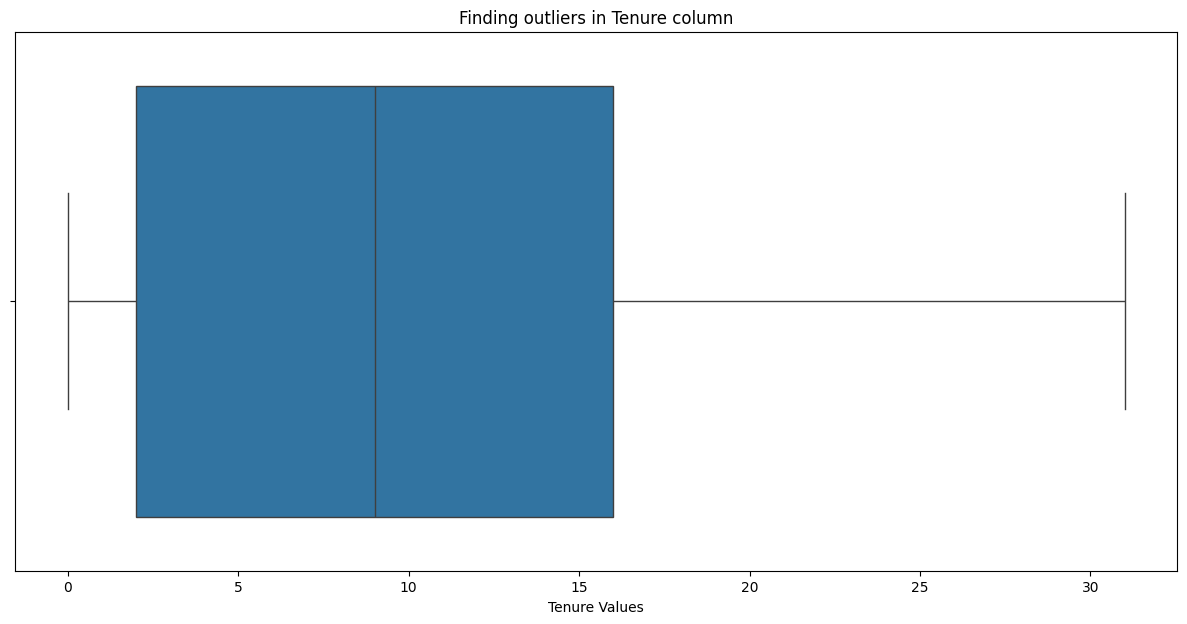

In [15]:
#Further Tenure column outliers configuration
plt.figure(figsize=(15,7))
Tenure_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['Tenure'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('Tenure Values', color='black')
Tenure_ax.set_title('Finding outliers in Tenure column',color= 'black')
plt.show()



---



**Column: WarehouseToHome**

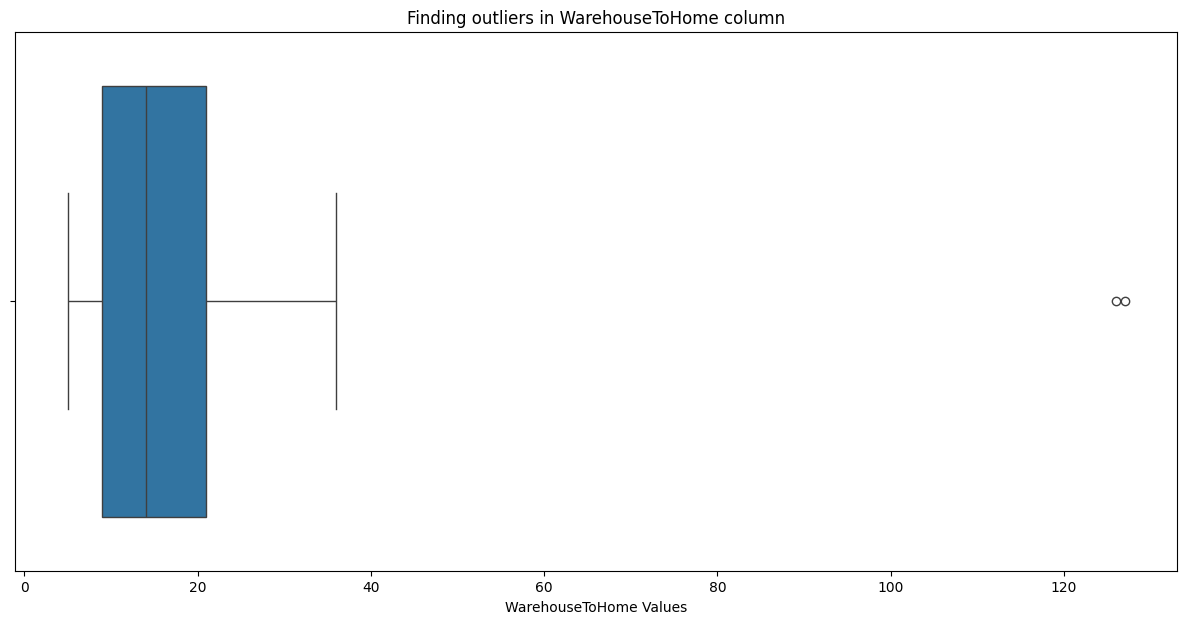

In [16]:
#Detecting Outliers WarehouseToHome Column
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('WarehouseToHome Values', color='black')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'black')
plt.show()

In [17]:

OnlineRetail['WarehouseToHome'].value_counts()

,count
WarehouseToHome,
9.0,536
8.0,417
7.0,375
16.0,305
14.0,286
10.0,269
15.0,269
6.0,258
13.0,233


In [18]:
#Column WarehouseToHome has outliers on values 126.0 and 127.0
OnlineRetail = OnlineRetail[OnlineRetail['WarehouseToHome'] < 126.0]

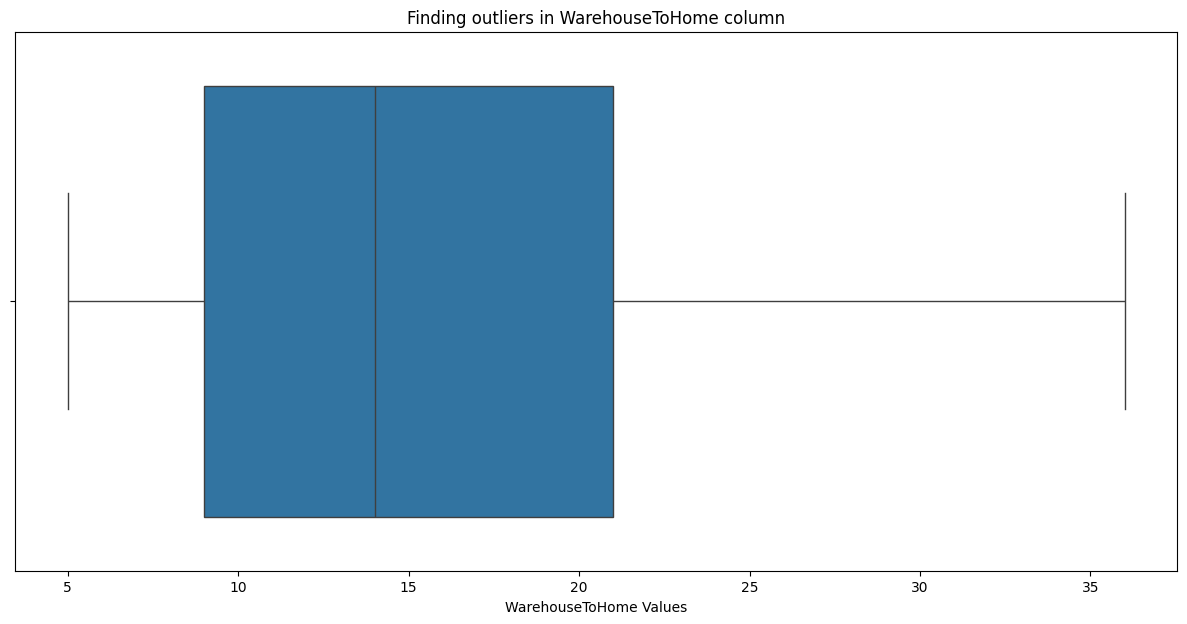

In [19]:
#Validating the changes
plt.figure(figsize=(15,7))
WarehouseToHome_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['WarehouseToHome'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('WarehouseToHome Values', color='black')
WarehouseToHome_ax.set_title('Finding outliers in WarehouseToHome column',color= 'black')
plt.show()



---



**Column: SatisfactionScore**

In [20]:
#Figuring out if there's extreme values
OnlineRetail['SatisfactionScore'].value_counts()

,count
SatisfactionScore,
3,1539
1,1066
5,1008
4,958
2,538


***There seems to be no extreme outliers, we will carry on with other columns***


---




**Column: NumberOfAddress**



In [21]:
#Figuring out if there are extreme values
OnlineRetail['NumberOfAddress'].value_counts()

,count
NumberOfAddress,
3,1246
2,1116
4,550
5,519
6,363
1,308
8,270
9,227
7,226


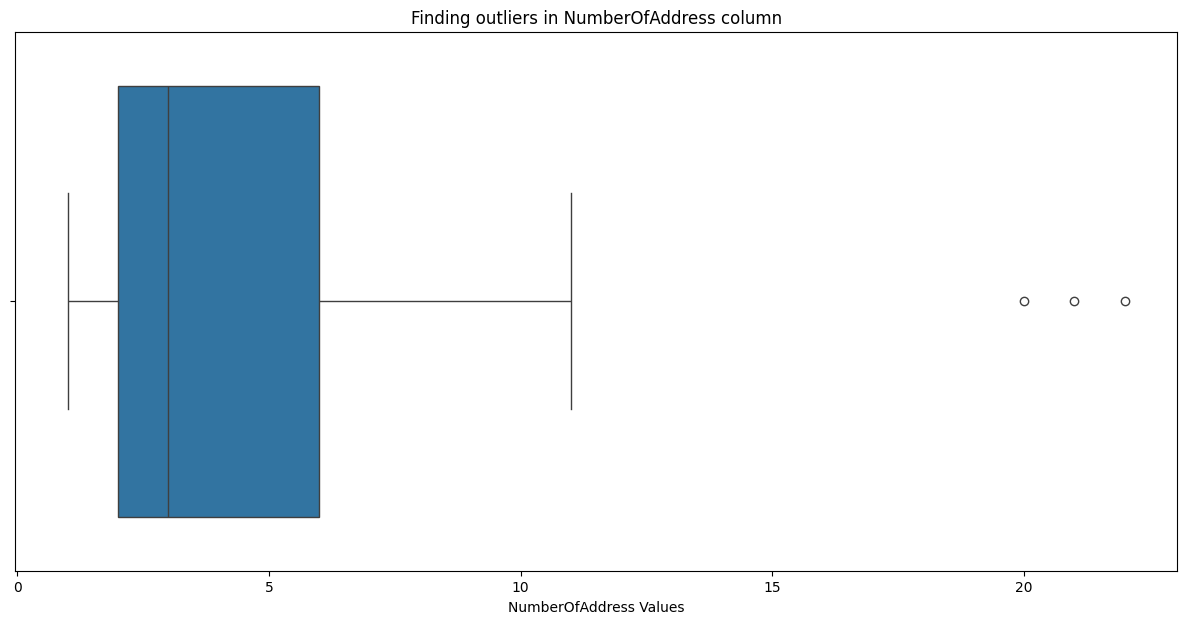

In [22]:
#Detecting Outliers NumberOfAddress Column
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('NumberOfAddress Values', color='black')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'black')
plt.show()

In [23]:
#Handling Extreme Values
OnlineRetail = OnlineRetail[OnlineRetail['NumberOfAddress'] < 20]

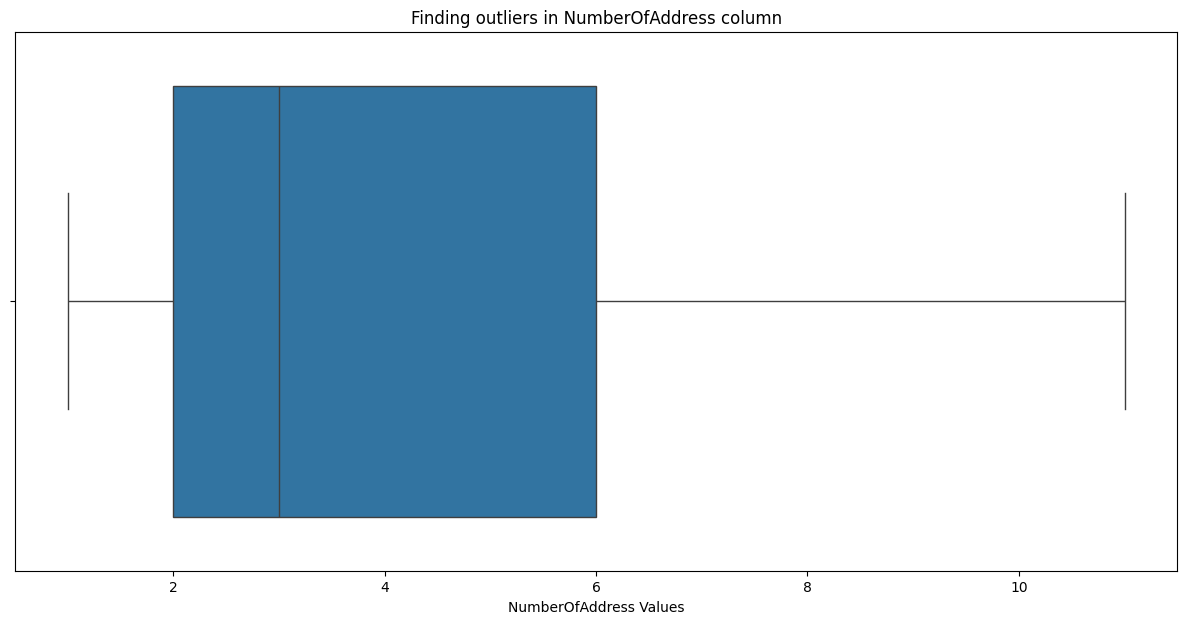

In [24]:
#Validating the changes
plt.figure(figsize=(15,7))
NumberOfAddress_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['NumberOfAddress'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('NumberOfAddress Values', color='black')
NumberOfAddress_ax.set_title('Finding outliers in NumberOfAddress column',color= 'black')
plt.show()



---



**Column: CouponUsed**

In [25]:
#Figuring out if there are extreme values
OnlineRetail['CouponUsed'].value_counts()

,count
CouponUsed,
1.0,1870
2.0,1239
0.0,808
3.0,321
4.0,193
5.0,125
6.0,102
7.0,87
8.0,42


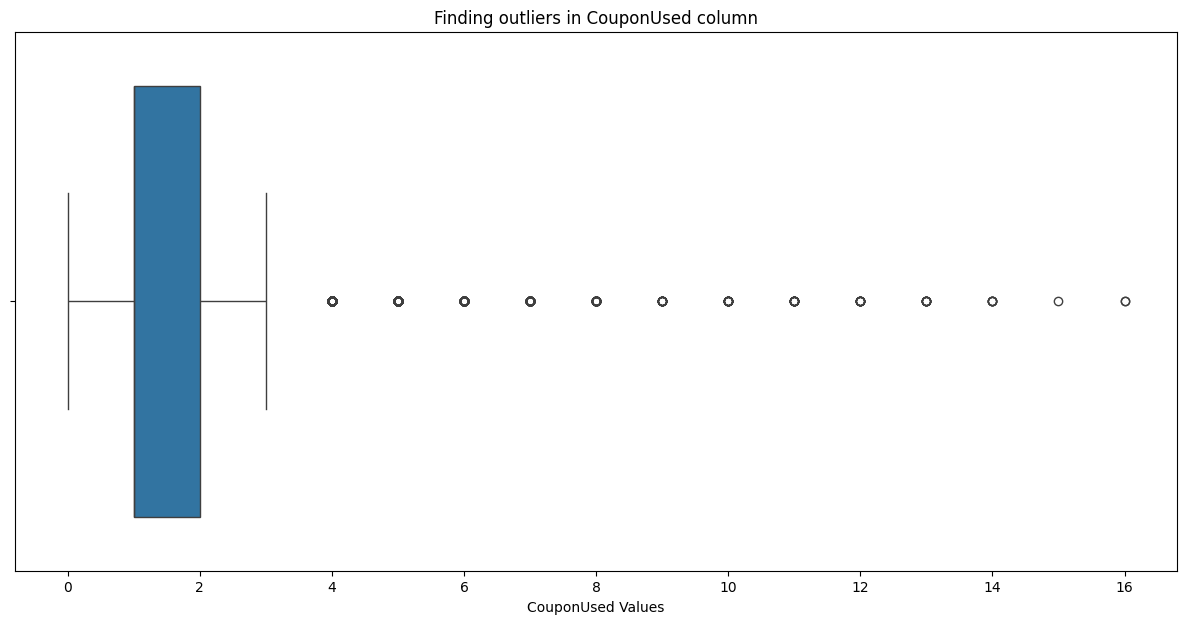

In [26]:
#Detecting outliers in CouponUsed Column
plt.figure(figsize=(15,7))
CouponUsed_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CouponUsed'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('CouponUsed Values', color='black')
CouponUsed_ax.set_title('Finding outliers in CouponUsed column',color= 'black')
plt.show()

***Outliers in column [CouponUsed] don't represent wrong measurement and they could provide useful information, Hence, I've decided to leave them***



---



**Column: DaySinceLastOrder**

In [27]:
#Figuring Out if there are extreme values.
OnlineRetail['DaySinceLastOrder'].value_counts()

,count
DaySinceLastOrder,
3.0,848
2.0,636
1.0,577
8.0,524
7.0,407
4.0,403
0.0,322
9.0,294
5.0,220


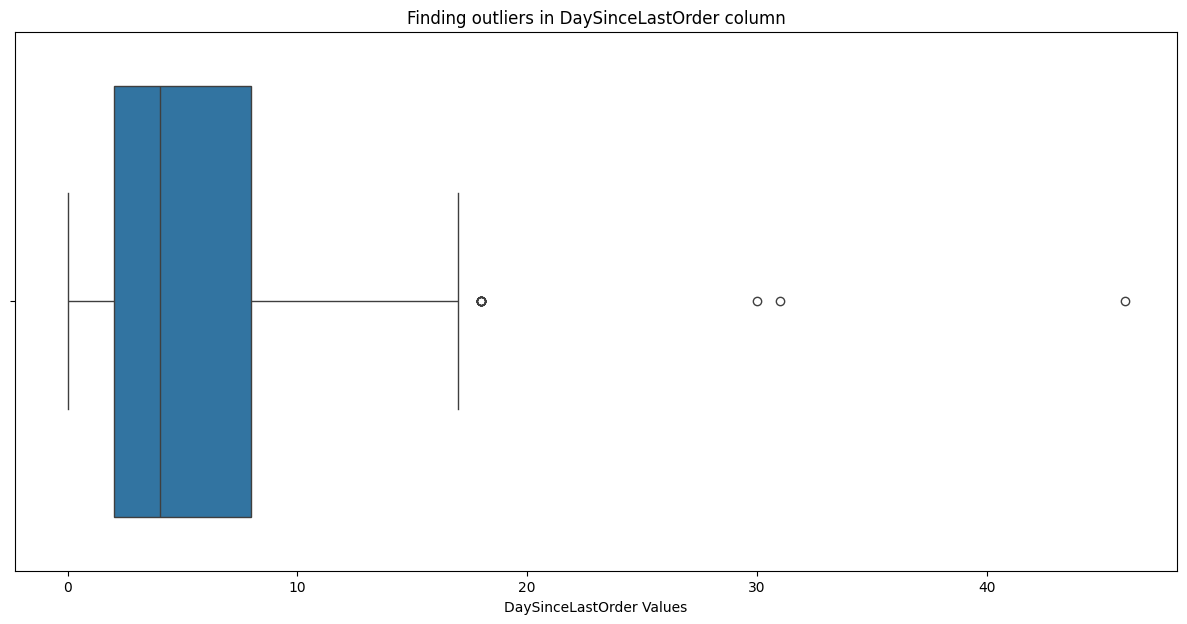

In [28]:
#There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.
plt.figure(figsize=(15,7))
DaySinceLastOrder_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['DaySinceLastOrder'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('DaySinceLastOrder Values', color='black')
DaySinceLastOrder_ax.set_title('Finding outliers in DaySinceLastOrder column',color= 'black')
plt.show()

***There are outliers yet since the column represents Recency of order then the outliers provide a relevant information and hence it is not problematic to leave them.***



---



**Outliers Conclusion:**  
- As Expected, There were outliers in columns: Tenure, WarehouseToHome, NumberOfAddress, CouponUsed, DaySinceLastOrder  
- Now, Let's make sure that the other columns don't contain outliers. Churn, CityTier, HoursSpendOnApp, NumberOfDeviceRegistered, Complain, OrderAmountHikeFromlastYear, CashbackAmount



---


Column: Churn

In [29]:
#Figuring Out if there are extreme values.
OnlineRetail['Churn'].value_counts()

,count
Churn,
0,4324
1,782


**Column: CityTier**

In [30]:
#Figuring Out if there are extreme values.
OnlineRetail['CityTier'].value_counts()

,count
CityTier,
1,3259
3,1637
2,210


**Column: HoursSpendOnApp**

In [31]:
#Figuring Out if there are extreme values.
OnlineRetail['HourSpendOnApp'].value_counts()

,count
HourSpendOnApp,
3.0,2447
2.0,1193
4.0,1172
1.0,33
0.0,3
5.0,3


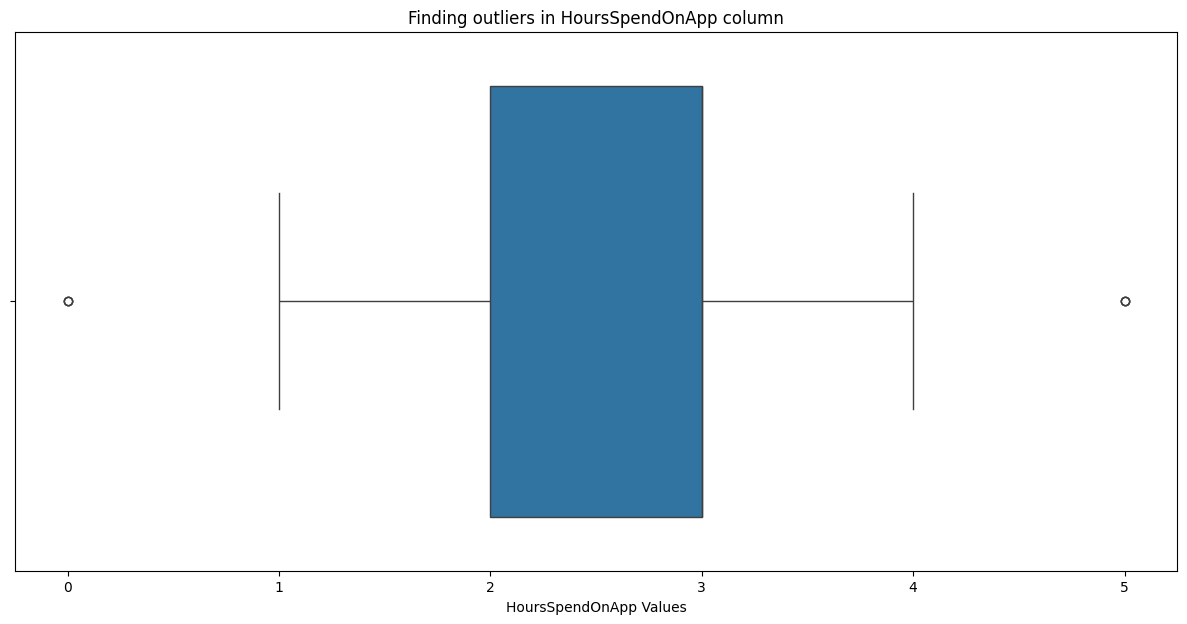

In [32]:
#Visualizing outliers using BoxPlot
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('HoursSpendOnApp Values', color='black')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'black')
plt.show()

In [33]:
#Handling outliers
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] > 0.0]
OnlineRetail = OnlineRetail[OnlineRetail['HourSpendOnApp'] < 5.0]

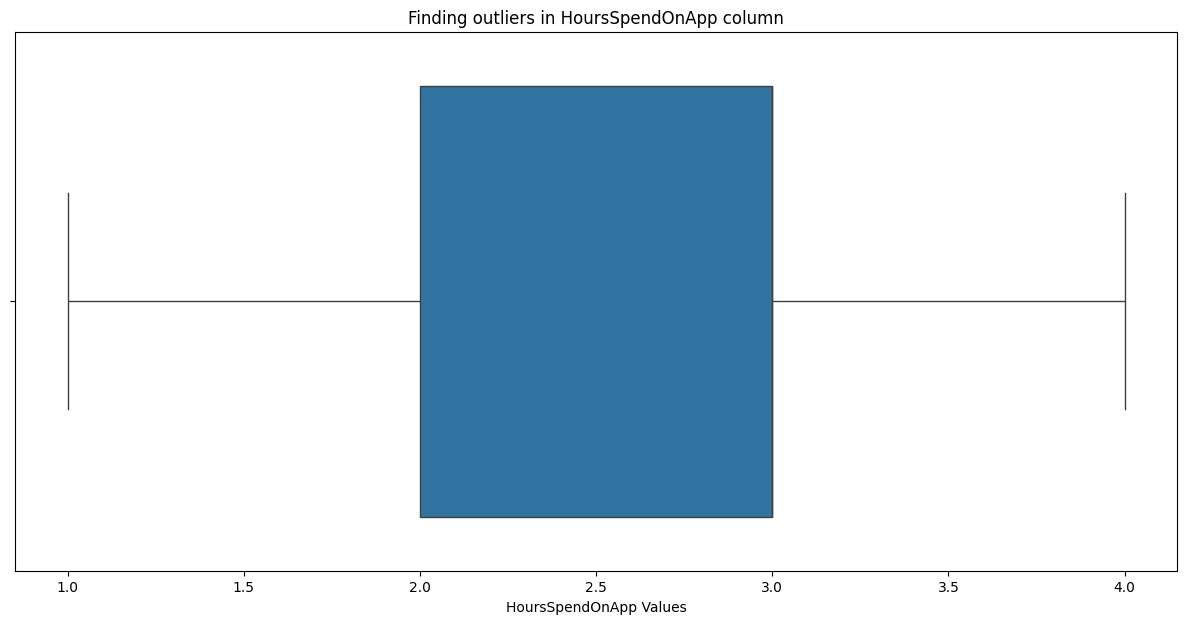

In [34]:
#Validating the changes
plt.figure(figsize=(15,7))
HoursSpendOnApp_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['HourSpendOnApp'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('HoursSpendOnApp Values', color='black')
HoursSpendOnApp_ax.set_title('Finding outliers in HoursSpendOnApp column',color= 'black')
plt.show()

**Column: NumberOfDeviceRegistered**

In [35]:
#Figuring Out if there are extreme values.
OnlineRetail['NumberOfDeviceRegistered'].value_counts()

,count
NumberOfDeviceRegistered,
4,2174
3,1235
5,841
2,267
1,166
6,162


**Column: Complain**

In [36]:
#Figuring Out if there are extreme values.
OnlineRetail['Complain'].value_counts()

,count
Complain,
0,3469
1,1376


**Column: OrderAmountHikeFromlastYear**

In [37]:
#Figuring Out if there are extreme values.
OnlineRetail['OrderAmountHikeFromlastYear'].value_counts()

,count
OrderAmountHikeFromlastYear,
14.0,643
12.0,637
13.0,622
15.0,496
11.0,295
16.0,279
18.0,273
19.0,267
17.0,258


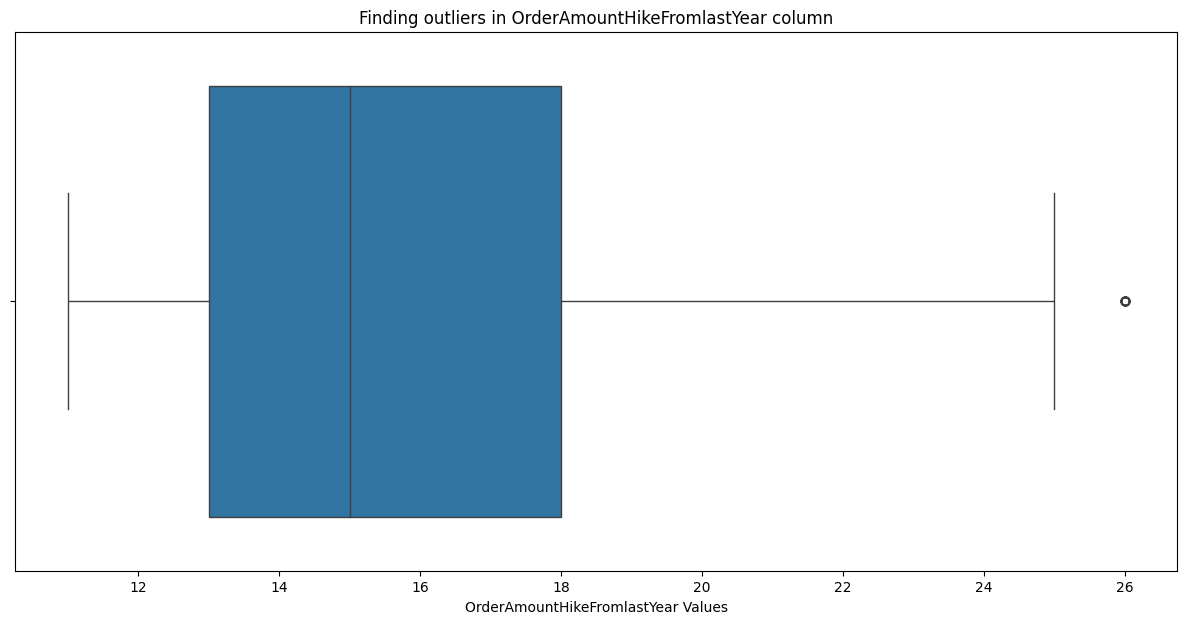

In [38]:
plt.figure(figsize=(15,7))
OrderAmountHikeFromlastYear_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['OrderAmountHikeFromlastYear'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='black')
OrderAmountHikeFromlastYear_ax.set_title('Finding outliers in OrderAmountHikeFromlastYear column',color= 'black')
plt.show()
#Since this column presents the increase percentage, Outliers is not problematic in this case

**Column: CashbackAmount**

In [39]:
#Figuring Out if there are extreme values.
OnlineRetail['CashbackAmount'].value_counts().sort_index()

,count
CashbackAmount,
0,4
12,1
25,4
37,1
56,1
...,...
321,12
322,10
323,6


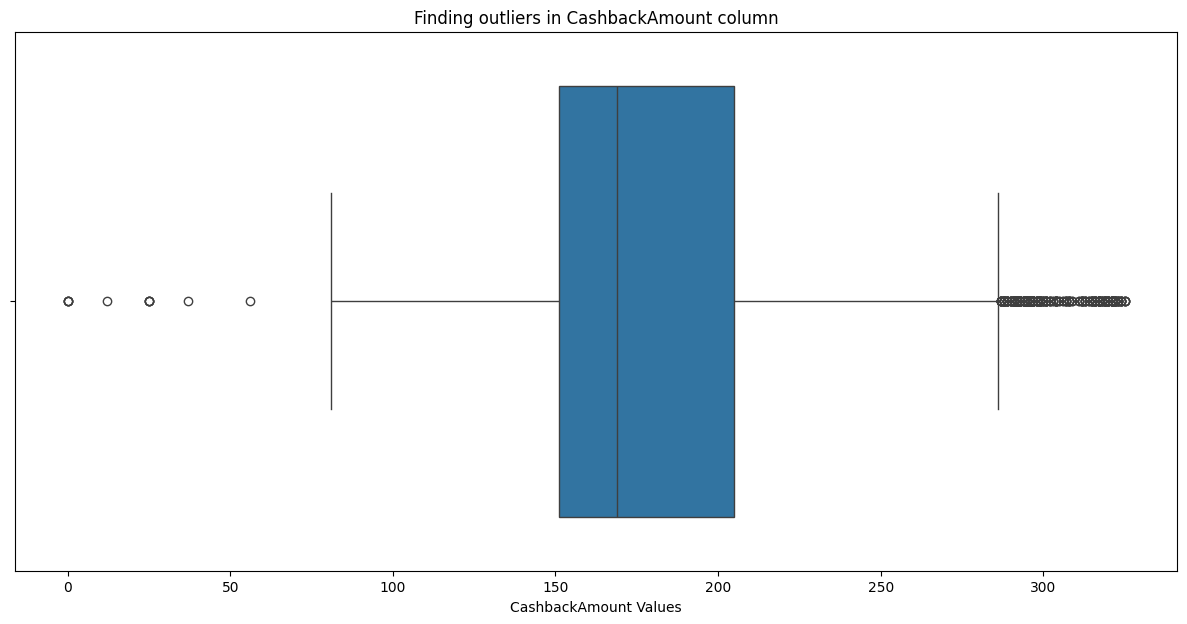

In [40]:
#Detecting outliers in CashbackAmount
plt.figure(figsize=(15,7))
CashbackAmount_ax = sns.boxplot(data = OnlineRetail, x = OnlineRetail['CashbackAmount'])
plt.tick_params(axis='x', colors='black')
plt.xlabel('CashbackAmount Values', color='black')
CashbackAmount_ax.set_title('Finding outliers in CashbackAmount column',color= 'black')
plt.show()

***Since this column represents an average cash back amount on monthly basis, it is normal to be a fluctuated amount and hence the outliers could be left as it is.***



---



## **Handling/Figuring out null values and Handling/Figuring out wrong values**

In [41]:
OnlineRetail.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


**Column: Churn**

In [42]:
#Churn
OnlineRetail['Churn'].unique()

array([0, 1])

**Column: Tenure**

In [43]:
#Tenure
OnlineRetail['Tenure'].unique()

array([20., 13., 16.,  5.,  9.,  1., 18., 23.,  6.,  8., 22.,  7.,  2.,
       11.,  4., 19., 12., 15., 17., 21., 27., 10., 14.,  3., 25., 31.,
        0., 30., 28., 26., 24., 29.])

**Column: PreferredLoginDevice**

In [44]:
#PreferredLoginDevice
OnlineRetail['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Computer', 'Phone'], dtype=object)

**Column: CityTier**

In [45]:
#CityTier
OnlineRetail['CityTier'].unique()

array([3, 1, 2])

**Column: WarehouseToHome**

In [46]:
#WarehouseToHome
OnlineRetail['WarehouseToHome'].unique()

array([ 7.,  9., 16., 28., 36., 17., 10., 14., 11., 23., 30.,  8.,  6.,
       15., 27., 35., 22., 26., 32., 21., 19., 31., 12., 13., 20., 18.,
       34., 33., 24.,  5., 29., 25.])

**Column: PreferredPaymentMode**

In [47]:
#PreferredPaymentMode
OnlineRetail['PreferredPaymentMode'].unique()

array(['E wallet', 'Cash on Delivery', 'Debit Card', 'UPI', 'Credit Card',
       'COD', 'CC'], dtype=object)

In [48]:
#Handling 'COD' and 'CC' values
#Replacing COD with Cash On Delivery
OnlineRetail['PreferredPaymentMode'].replace('COD','Cash on Delivery', inplace=True)

#Replacing CC with Credit Card
OnlineRetail['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True)

#Replacing nan with Other
OnlineRetail['PreferredPaymentMode'].fillna(value='Other', inplace=True)

<ipython-input-48-ca54378a6ab2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OnlineRetail['PreferredPaymentMode'].replace('COD','Cash on Delivery', inplace=True)
<ipython-input-48-ca54378a6ab2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

**Column: Gender**

In [49]:
#Gender
OnlineRetail['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**Column: HourSpendOnApp**

In [50]:
#HourSpendOnApp
OnlineRetail['HourSpendOnApp'].unique()

array([4., 3., 1., 2.])

**Column: NumberOfDeviceRegistered**

In [51]:
#NumberOfDeviceRegistered
OnlineRetail['NumberOfDeviceRegistered'].unique()

array([4, 5, 2, 6, 3, 1])

**Column: PreferedOrderCat**

In [52]:
#PreferedOrderCat
OnlineRetail['PreferedOrderCat'].unique()

array(['Fashion', 'Laptop & Accessory', 'Mobile Phone', 'Grocery',
       'Others', 'Mobile'], dtype=object)

In [53]:
#Handling 'Mobile' value in PreferedOrderCat
OnlineRetail['PreferedOrderCat'].replace('Mobile','Mobile Phone',inplace=True)

<ipython-input-53-e7d3f3bbd8f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OnlineRetail['PreferedOrderCat'].replace('Mobile','Mobile Phone',inplace=True)


**Column: SatisfactionScore**

In [54]:
#SatisfactionScore
OnlineRetail['SatisfactionScore'].unique()

array([5, 3, 4, 2, 1])

**Column: MaritalStatus**

In [55]:
#MaritalStatus
OnlineRetail['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

**Column: NumberOfAddress**

In [56]:
#NumberOfAddress
OnlineRetail['NumberOfAddress'].unique()

array([ 3,  2,  6,  4,  1,  5, 10,  7,  9, 11,  8])

**Column: Complain**

In [57]:
#Complain
OnlineRetail['Complain'].unique()

array([0, 1])

**Column: OrderAmountHikeFromlastYear**

In [58]:
#OrderAmountHikeFromlastYear
OnlineRetail['OrderAmountHikeFromlastYear'].unique()

array([26., 25., 24., 23., 22., 21., 20., 19., 18., 17., 16., 15., 14.,
       13., 12., 11., nan])

**Column: CouponUsed**

In [59]:
#CouponUsed
OnlineRetail['CouponUsed'].unique()

array([ 5., 11.,  2.,  1., nan,  9.,  7.,  4., 10.,  0.,  8.,  6.,  3.,
       14., 13., 16., 12.])

**Column: OrderCount**

In [60]:
#OrderCount
OnlineRetail['OrderCount'].unique()

array([16., nan, 12.,  2.,  6.,  3.,  8.,  7., 14., 15., 11.,  1.,  4.,
       13.,  9.,  5., 10.])

**Column: DaySinceLastOrder**

In [61]:
#DaySinceLastOrder
OnlineRetail['DaySinceLastOrder'].unique()

array([nan,  9.,  7.,  8.,  1., 18.,  3., 10.,  6., 17.,  2., 11., 12.,
        0.,  4.,  5., 15., 14., 16., 13., 31., 30., 46.])

**Column: CashbackAmount**

In [62]:
#CashbackAmount
OnlineRetail['CashbackAmount'].unique()

array([230, 234, 174, 231, 165, 151, 170, 144, 173, 237, 148, 277, 179,
       161, 177, 262, 205, 209, 149, 206, 140, 145, 252, 274, 154, 136,
       152, 212, 186, 181, 214, 167, 194, 153, 150, 162, 323, 171, 222,
       235, 156, 189, 142, 169, 272, 137, 276, 146, 197, 210, 159, 164,
       193, 202, 178, 187, 244, 232, 211, 261, 176, 134, 139, 268, 168,
       270, 219, 207, 236, 201, 286, 157, 200, 180, 188, 263, 325, 221,
        25, 195, 216, 184, 175, 260, 288, 111, 185, 155, 163, 238, 196,
       269, 279, 281,   0, 143, 191, 158, 250, 199, 241, 213, 141, 227,
       228, 289, 223, 160, 198, 224, 192, 220, 183, 147, 133, 225, 138,
       203, 264, 135, 182, 285, 255, 123, 190, 287, 273, 229, 166, 265,
       204, 208, 248, 240, 282, 245, 172, 258, 233, 291, 243, 132, 246,
       256, 257, 253, 218, 266, 254, 324, 215, 271, 292, 247, 242, 226,
       283, 290, 280, 217, 278, 259,  37,  81, 267, 127, 284, 249,  12,
       239,  56, 112, 275, 110, 295, 299, 300, 294, 293, 296, 29



---



## **Feature Engineering: One Hot Encoding**

PreferredLoginDevice, PreferredPaymentMode, Gender, PreferedOrderCat and MaritalStatus

In [63]:
#Turning Nominal Object columns into seperate columns
OneHot_Columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
OnlineRetail = pd.get_dummies(OnlineRetail, columns= OneHot_Columns)

In [64]:
#Validating the changes
OnlineRetail.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

## **Handling nulls**

### **Method 1: Dropping nulls**

In [65]:
#Let's take a copy and drop nulls
OnlineRetail_NoNull = OnlineRetail.copy()
OnlineRetail_NoNull.dropna(inplace=True)

**Modeling: Decision Tree**

In [66]:
#Spliting the dataset into train test (70,30)
y = OnlineRetail_NoNull['Churn']
x = OnlineRetail_NoNull.drop('Churn', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state=0)

In [67]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [68]:
dt_y_pred_test = dt.predict(x_test)
dt_y_pred_train = dt.predict(x_train)

In [69]:
 #Decision Tree Classification Report
print(classification_report(y_train, dt_y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2193
           1       1.00      1.00      1.00       441

    accuracy                           1.00      2634
   macro avg       1.00      1.00      1.00      2634
weighted avg       1.00      1.00      1.00      2634



In [70]:
 #Decision Tree Classification Report
 print(classification_report(y_test, dt_y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       940
           1       0.78      0.84      0.81       189

    accuracy                           0.93      1129
   macro avg       0.87      0.89      0.88      1129
weighted avg       0.94      0.93      0.93      1129



**Modeling: Random Forest**

In [71]:
rn = RandomForestClassifier()
rn.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
rn_pred_train = rn.predict(x_train)
rn_pred_test = rn.predict(x_test)

In [73]:
#Random Forest Classification Report
print(classification_report(y_test, rn_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       940
           1       0.95      0.75      0.84       189

    accuracy                           0.95      1129
   macro avg       0.95      0.87      0.90      1129
weighted avg       0.95      0.95      0.95      1129



In [74]:
#Random Forest Classification Report
print(classification_report(y_train, rn_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2193
           1       1.00      1.00      1.00       441

    accuracy                           1.00      2634
   macro avg       1.00      1.00      1.00      2634
weighted avg       1.00      1.00      1.00      2634



**Method 1 Conclusion:**

Handling nulls through dropping them results in a not bad model, Yet, Let's try how the model would perform if we filled in the nulls.



---


### **Method 2: Filling nulls with Multivariate Imputation By Chained Equations algorithm**

In [75]:
#Taking a copy of columns with null values
df_missing_columns = OnlineRetail.filter(
    ['CustomerID','OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder'], axis=1).copy()

#Defining MICE imputer and filling in missing values
missing_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None,
                                   imputation_order='ascending')
df_missing_imputed = pd.DataFrame(missing_imputer.fit_transform(df_missing_columns),
                                  columns=df_missing_columns.columns)
Cleaned_OnlineRetail = OnlineRetail.copy()
Cleaned_OnlineRetail.drop(['OrderAmountHikeFromlastYear','CouponUsed','OrderCount', 'DaySinceLastOrder'], axis = 1 , inplace = True)
OnlineRetail_MICE = Cleaned_OnlineRetail.set_index('CustomerID').join(df_missing_imputed.set_index('CustomerID'))
OnlineRetail_MICE.reset_index(inplace=True)

In [76]:
OnlineRetail_MICE.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
CityTier,0
WarehouseToHome,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0
SatisfactionScore,0
NumberOfAddress,0
Complain,0


**Modeling: Decision Tree**

In [77]:
#Spliting the dataset into train test (70,30)
MICE_y = OnlineRetail_MICE['Churn']
MICE_x = OnlineRetail_MICE.drop('Churn', axis=1)
MICE_x_train, MICE_x_test, MICE_y_train, MICE_y_test = train_test_split(MICE_x, MICE_y, test_size = 0.3, stratify=MICE_y, random_state=0)

In [78]:
#Fitting and Predicting
dt.fit(MICE_x_train,MICE_y_train)
MICE_dt_y_pred_test = dt.predict(MICE_x_test)
MICE_dt_y_pred_train = dt.predict(MICE_x_train)

In [79]:
 #Decision Tree Classification Report
print(classification_report(MICE_y_train, MICE_dt_y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00       507

    accuracy                           1.00      3391
   macro avg       1.00      1.00      1.00      3391
weighted avg       1.00      1.00      1.00      3391



In [80]:
#Decision Tree Classification Report
print(classification_report(MICE_y_test, MICE_dt_y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1237
           1       0.76      0.77      0.76       217

    accuracy                           0.93      1454
   macro avg       0.86      0.86      0.86      1454
weighted avg       0.93      0.93      0.93      1454



**Modeling: Random Forest**

In [81]:
rn.fit(MICE_x_train,MICE_y_train)
MICE_rn_pred_train = rn.predict(MICE_x_train)
MICE_rn_pred_test = rn.predict(MICE_x_test)

In [82]:
#Random Forest Classification Report
print(classification_report(MICE_y_train, MICE_rn_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00       507

    accuracy                           1.00      3391
   macro avg       1.00      1.00      1.00      3391
weighted avg       1.00      1.00      1.00      3391



In [83]:
#Random Forest Classification Report
print(classification_report(MICE_y_test, MICE_rn_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1237
           1       0.97      0.71      0.82       217

    accuracy                           0.95      1454
   macro avg       0.96      0.86      0.90      1454
weighted avg       0.96      0.95      0.95      1454




**Method 2 Conclusion:**

Decision Tree returned an OK result yet Method 1 was better, Yet, In Method 2 Random Forest, The model was off or can be considered inaccurate.


---




### **Method 3: Filling nulls with interpolate in Pandas that could predict the nulls using the correlation with other columns.**

***The nulls are handled first through distributions***

In [84]:
#Validating that there are nulls
OnlineRetail.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
CityTier,0
WarehouseToHome,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0
SatisfactionScore,0
NumberOfAddress,0
Complain,0


**Handling nulls in the following columns:** OrderAmountHikeLastYear, CouponUsed, OrderCount and DaySinceLastOrder

**Column: OrderAmountHikeFromlastYear**

In [85]:
#Taking a copy of the dataframe
OnlineRetail_Interpolate = OnlineRetail.copy()

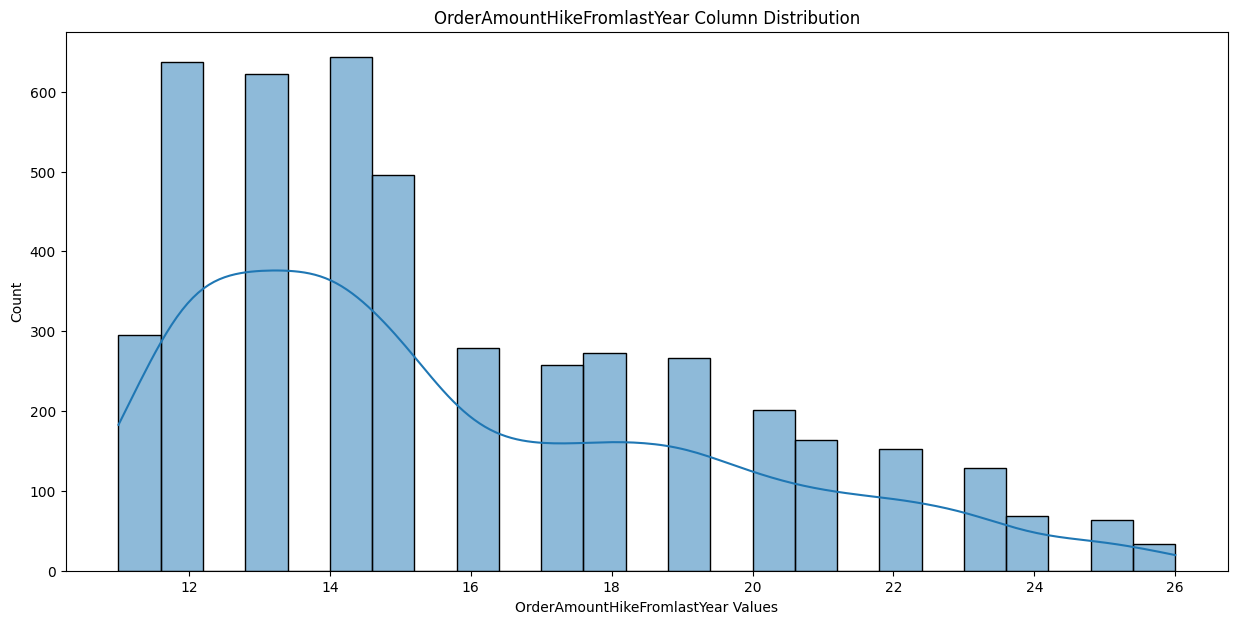

In [86]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_OrderAmountHikeFromlastYear_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_OrderAmountHikeFromlastYear_plt.set_title('OrderAmountHikeFromlastYear Column Distribution',color= 'black')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='black')
plt.show()

In [87]:
OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'].interpolate(method = 'linear', inplace=True)

<ipython-input-87-23178bcc657d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'].interpolate(method = 'linear', inplace=True)


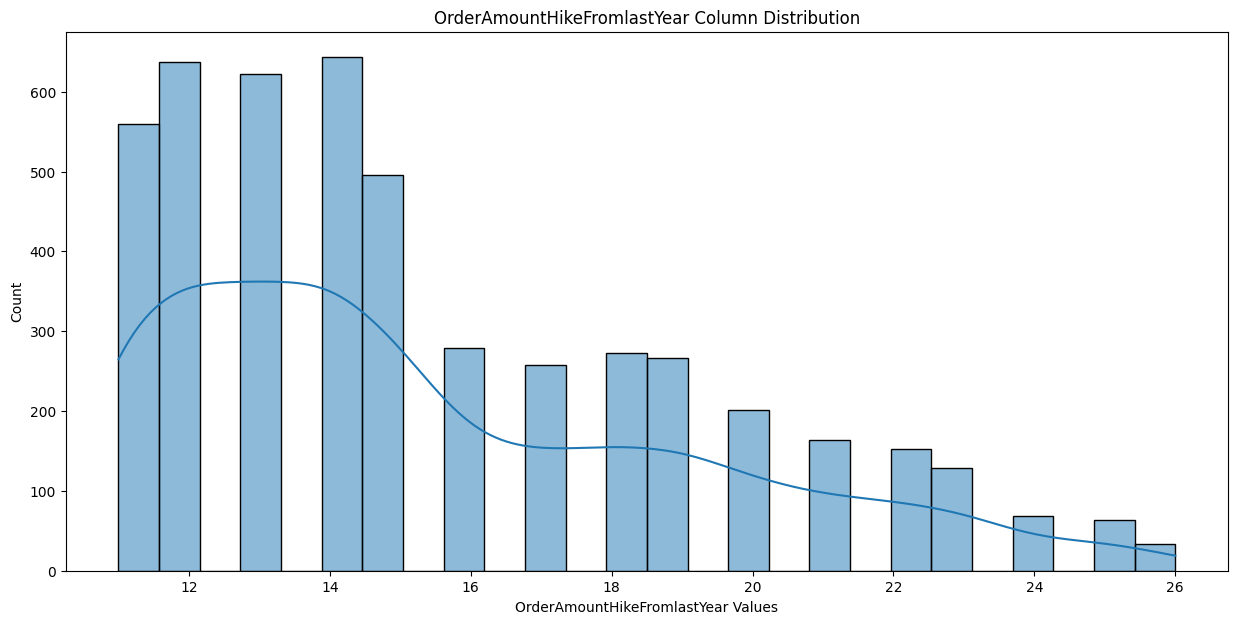

In [88]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_OrderAmountHikeFromlastYear_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_OrderAmountHikeFromlastYear_plt.set_title('OrderAmountHikeFromlastYear Column Distribution',color= 'black')
plt.xlabel('OrderAmountHikeFromlastYear Values', color='black')
plt.show()

In [89]:
#Validating the changes in nulls
OnlineRetail_Interpolate['OrderAmountHikeFromlastYear'].isnull().sum()

np.int64(0)

**Column: CouponUsed**

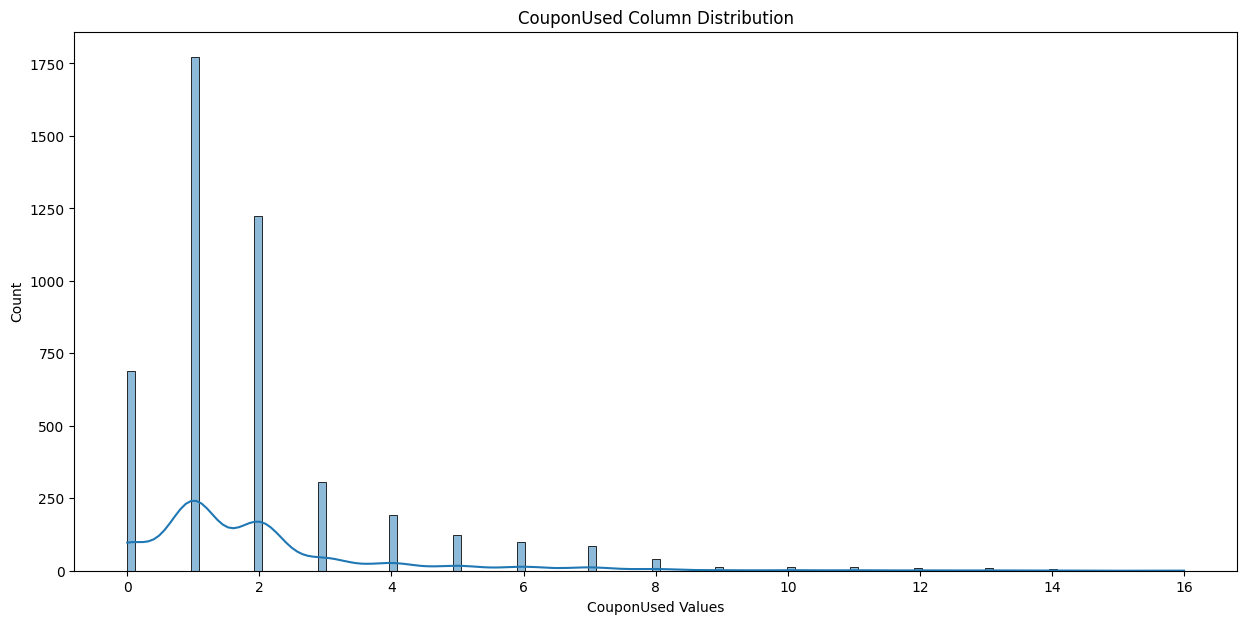

In [90]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_CouponUsed_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['CouponUsed'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_CouponUsed_plt.set_title('CouponUsed Column Distribution',color= 'black')
plt.xlabel('CouponUsed Values', color='black')
plt.show()

In [91]:
OnlineRetail_Interpolate['CouponUsed'].interpolate(method = 'linear', inplace=True)

<ipython-input-91-37cf0a533a49>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OnlineRetail_Interpolate['CouponUsed'].interpolate(method = 'linear', inplace=True)


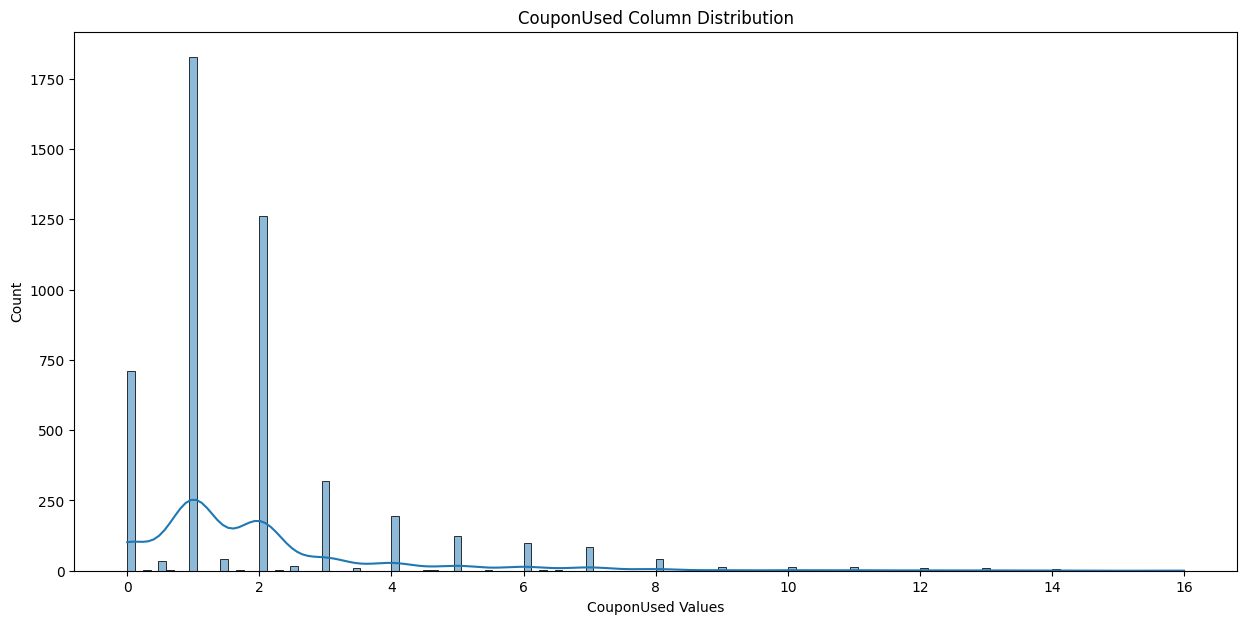

In [92]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_CouponUsed_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['CouponUsed'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_CouponUsed_plt.set_title('CouponUsed Column Distribution',color= 'black')
plt.xlabel('CouponUsed Values', color='black')
plt.show()

In [93]:
#Validating the changes in nulls
OnlineRetail_Interpolate['CouponUsed'].isnull().sum()

np.int64(0)

**Column: OrderCount**

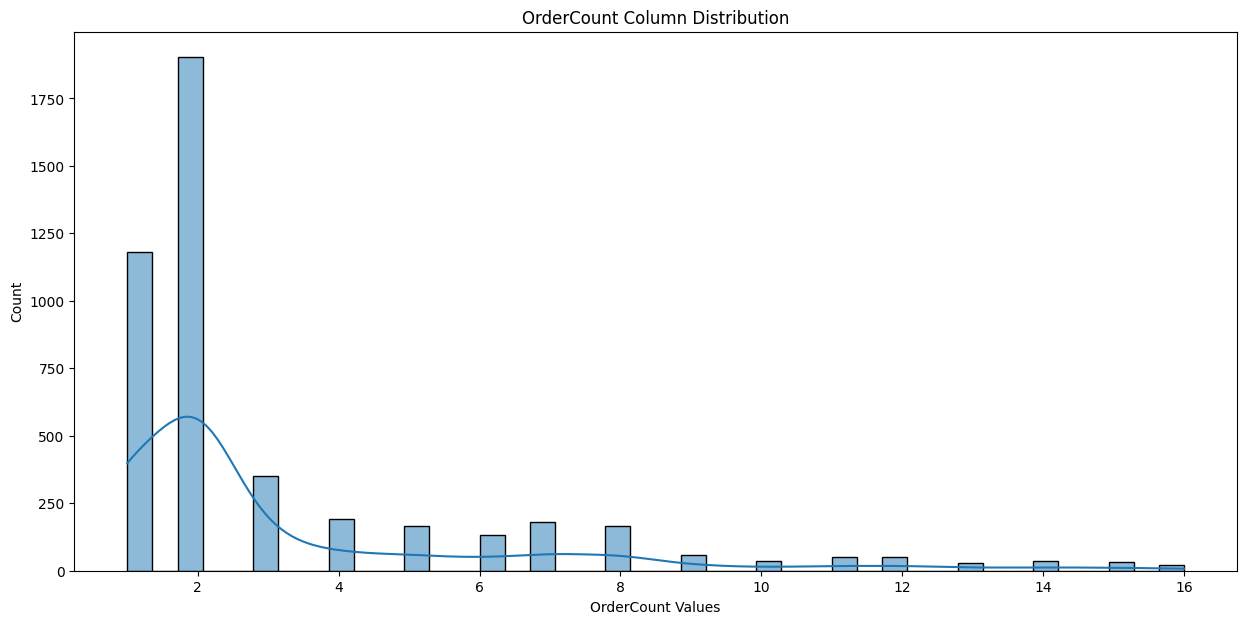

In [94]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_OrderCount_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderCount'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_OrderCount_plt.set_title('OrderCount Column Distribution',color= 'black')
plt.xlabel('OrderCount Values', color='black')
plt.show()

In [95]:
OnlineRetail_Interpolate['OrderCount'].interpolate(method = 'linear', inplace=True)

<ipython-input-95-3389d6f72e1e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OnlineRetail_Interpolate['OrderCount'].interpolate(method = 'linear', inplace=True)


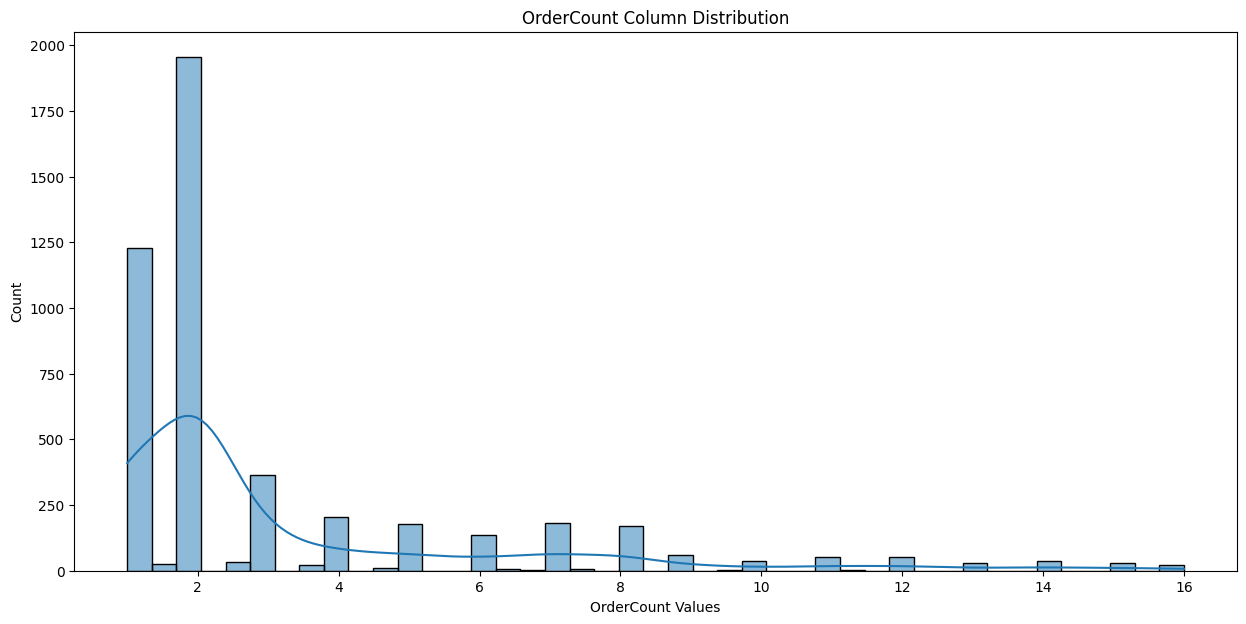

In [96]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_OrderCount_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['OrderCount'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_OrderCount_plt.set_title('OrderCount Column Distribution',color= 'black')
plt.xlabel('OrderCount Values', color='black')
plt.show()

In [97]:
#Validating the changes in nulls
OnlineRetail_Interpolate['OrderCount'].isnull().sum()

np.int64(0)

**Column: DaySinceLastOrder**

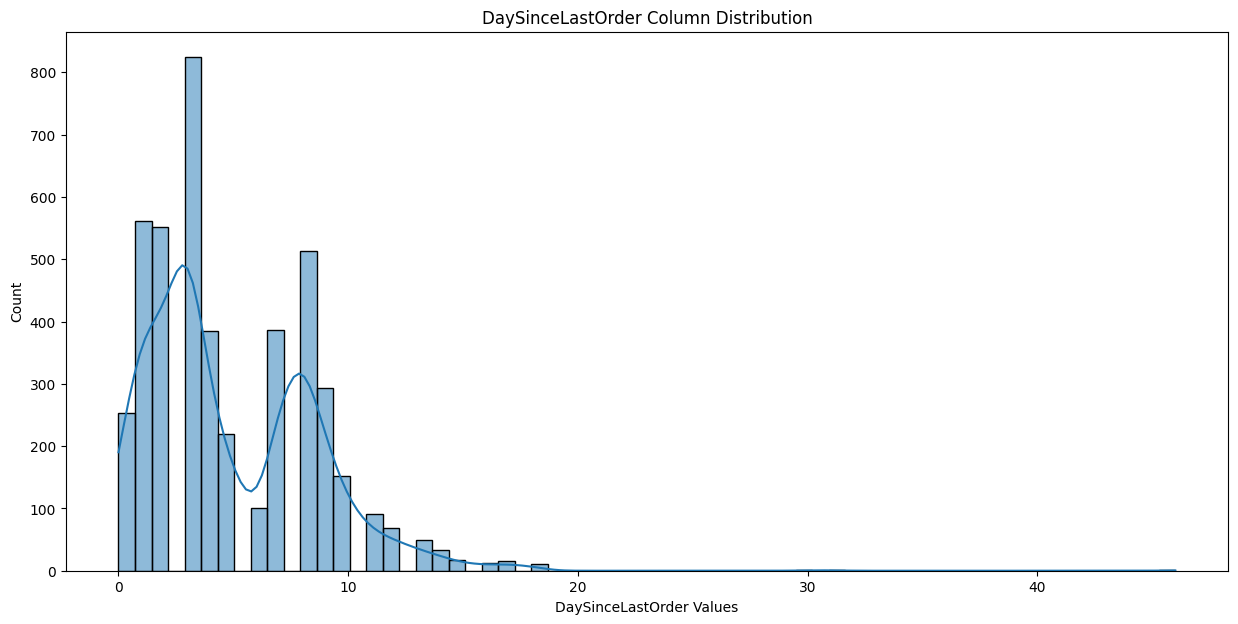

In [98]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
Interpolat_DaySinceLastOrder_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['DaySinceLastOrder'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_DaySinceLastOrder_plt.set_title('DaySinceLastOrder Column Distribution',color= 'black')
plt.xlabel('DaySinceLastOrder Values', color='black')
plt.show()

In [99]:
OnlineRetail_Interpolate['DaySinceLastOrder'].interpolate(method = 'linear', inplace=True)

<ipython-input-99-8efae7c653d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OnlineRetail_Interpolate['DaySinceLastOrder'].interpolate(method = 'linear', inplace=True)


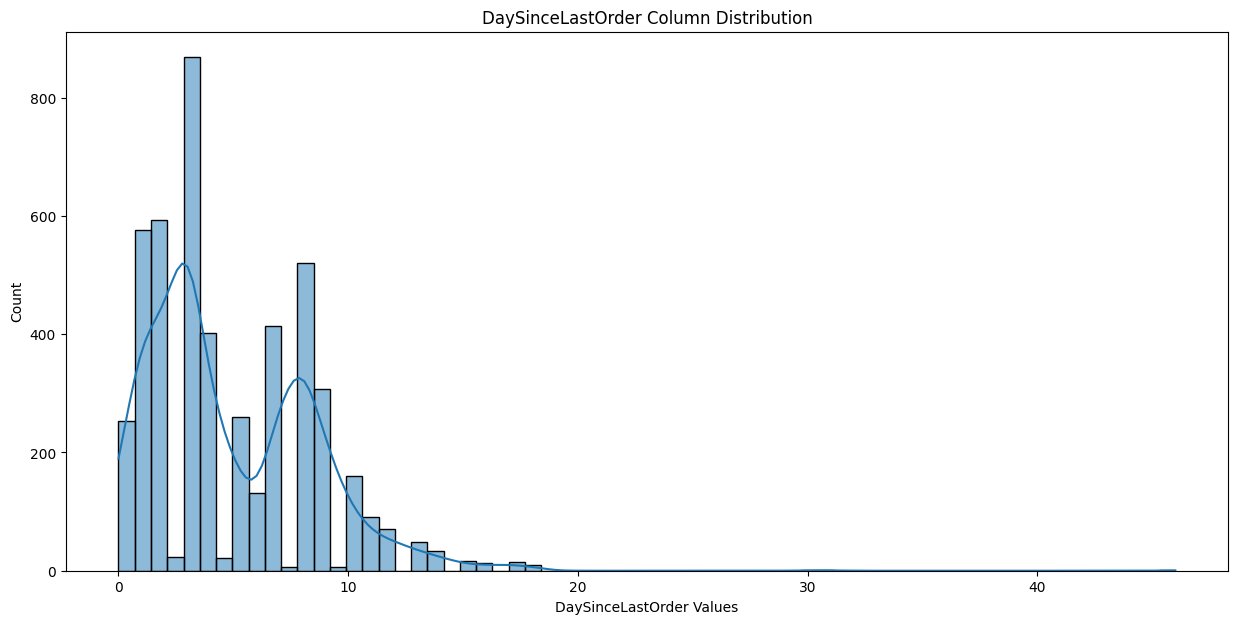

In [100]:
#Making sure the column still has the same distribution
plt.figure(figsize=(15,7))
Interpolat_DaySinceLastOrder_plt = sns.histplot(data = OnlineRetail_Interpolate, x = OnlineRetail_Interpolate['DaySinceLastOrder'], kde=True)
plt.tick_params(axis='x', colors='black')
Interpolat_DaySinceLastOrder_plt.set_title('DaySinceLastOrder Column Distribution',color= 'black')
plt.xlabel('DaySinceLastOrder Values', color='black')
plt.show()

In [101]:
#Validating the changes in nulls
OnlineRetail_Interpolate['DaySinceLastOrder'].isnull().sum()

np.int64(1)

**Nulls: Final Validation**



In [102]:
#Validating the changes in nulls
OnlineRetail_Interpolate.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
CityTier,0
WarehouseToHome,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0
SatisfactionScore,0
NumberOfAddress,0
Complain,0


# **Modeling: Decision Tree**

In [103]:
#Spliting the dataset into train test (70,30)
OnlineRetail_Interpolate_y = OnlineRetail_Interpolate['Churn']
OnlineRetail_Interpolate_x = OnlineRetail_Interpolate.drop('Churn', axis=1)
OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_x_test, OnlineRetail_Interpolate_y_train, OnlineRetail_Interpolate_y_test = train_test_split(OnlineRetail_Interpolate_x, OnlineRetail_Interpolate_y, test_size = 0.3, stratify=OnlineRetail_Interpolate_y, random_state=0)

In [104]:
dt.fit(OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_y_train)

DecisionTreeClassifier(random_state=0)

In [105]:
dt_y_pred_test_v2 = dt.predict(OnlineRetail_Interpolate_x_test)
dt_y_pred_train_v2 = dt.predict(OnlineRetail_Interpolate_x_train)

In [106]:
#Decision Tree Classification Report
print(classification_report(OnlineRetail_Interpolate_y_train, dt_y_pred_train_v2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00       507

    accuracy                           1.00      3391
   macro avg       1.00      1.00      1.00      3391
weighted avg       1.00      1.00      1.00      3391



In [107]:
#Decision Tree Classification Report
print(classification_report(OnlineRetail_Interpolate_y_test, dt_y_pred_test_v2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1237
           1       0.77      0.77      0.77       217

    accuracy                           0.93      1454
   macro avg       0.86      0.86      0.86      1454
weighted avg       0.93      0.93      0.93      1454



# **Modeling: Random Forest**

In [108]:
rn.fit(OnlineRetail_Interpolate_x_train, OnlineRetail_Interpolate_y_train)
rn_y_pred_test_v2 = dt.predict(OnlineRetail_Interpolate_x_test)
rn_y_pred_train_v2 = dt.predict(OnlineRetail_Interpolate_x_train)

In [109]:
#Random Forest Classification Report
print(classification_report(OnlineRetail_Interpolate_y_train, rn_y_pred_train_v2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2884
           1       1.00      1.00      1.00       507

    accuracy                           1.00      3391
   macro avg       1.00      1.00      1.00      3391
weighted avg       1.00      1.00      1.00      3391



In [110]:
#Random Forest Classification Report
print(classification_report(OnlineRetail_Interpolate_y_test, rn_y_pred_test_v2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1237
           1       0.77      0.77      0.77       217

    accuracy                           0.93      1454
   macro avg       0.86      0.86      0.86      1454
weighted avg       0.93      0.93      0.93      1454





---


# **Modeling Conclusion**
- We have used Classification Report as a matric of model evaluation to use **Recall** in particular because we want to evaluate the maximum number of churned customers out of the total churned customers.  

- Out of the 2 models **(Decision Tree, Random Forest)** in the 3 different null handling methods, We figured out that Random Forest has the best **Recall Percentage**, Hence, We have decided to use **Random Forest** as our final model.  

- Finally, It terms of **Recall Score** of the 3 null handling methods, There's a close score between **Dropping Nulls** and **Interpolate** and since **Interpolate** is better in terms of keeping rows on a larger scale dataset, We figured out that it is the best way to use in this case.  

In [112]:
#Exporting the dataset for further analysis
OnlineRetail_Interpolate.to_csv('OnlineRetail.csv')

In [113]:
from google.colab import files
files.download('OnlineRetail.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


# **Data Analysis**

In [115]:
#Reading the data with no One Hot Encoding
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/OnlineRetail.csv')

In [116]:
OnlineRetail_V2 = data.copy()

## Q1) ***Analyze the number of days since the last order by the customer to create targeted marketing campaigns and offer personalized discounts***

In [117]:
OnlineRetail_V2['DaySinceLastOrder'].describe()

,DaySinceLastOrder
count,4844.000000
mean,4.892754
std,3.608170
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,46.000000


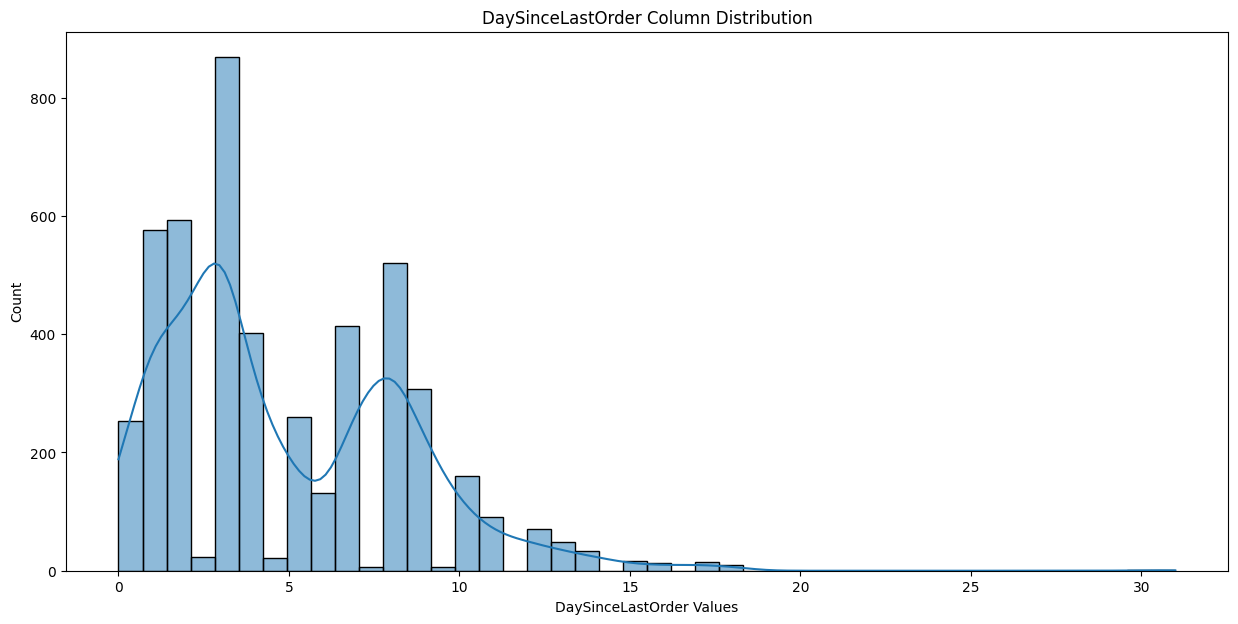

In [118]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
v2_daysincelastorder = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['DaySinceLastOrder'][OnlineRetail_V2['DaySinceLastOrder'] <40 ], kde=True)
v2_daysincelastorder.set_title('DaySinceLastOrder Column Distribution',color= 'black')
plt.xlabel('DaySinceLastOrder Values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()


> ***e Majority of the customers fall into a value of 0 to 10 days since their last order, Hence, Targeting this segment would encourage them to reorder and reduce the 10 days cycle and increase sales.***






In [119]:
#Further Analysis on this point
#Seperating Churned and not churned customers
Churned = OnlineRetail_V2['Churn'] == 1

In [120]:
OnlineRetail_V2['DaySinceLastOrder'][Churned].describe()

,DaySinceLastOrder
count,724.000000
mean,3.856814
std,3.454648
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,46.000000


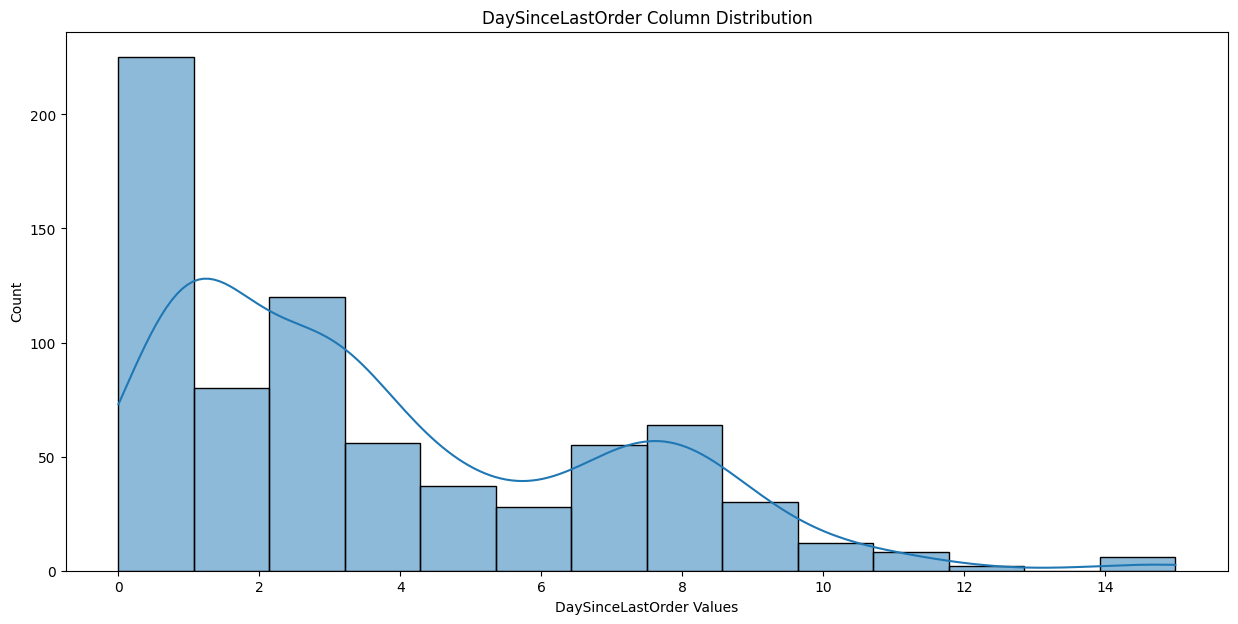

In [121]:
#Figuring out the distribution
plt.figure(figsize=(15,7))
v2_daysincelastorder = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['DaySinceLastOrder'][Churned][OnlineRetail_V2['DaySinceLastOrder'] < 40 ], kde=True)
v2_daysincelastorder.set_title('DaySinceLastOrder Column Distribution',color= 'black')
plt.xlabel('DaySinceLastOrder Values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()



>*** Approximately 50% of customers churn after 3 days of their last order while 75% of customers churn after 6 days of their last order, Moreover, on average, it takes customers from 3 to 4 days to churn after their last order***




## **Q2) Is there any difference in the buying behavior of male and female customers?**

In [122]:
# Counting the number of males and females in the dataset
male_count = OnlineRetail_V2['Gender_Male'].sum()
female_count = OnlineRetail_V2['Gender_Female'].sum()

male_count, female_count

(np.int64(2887), np.int64(1958))

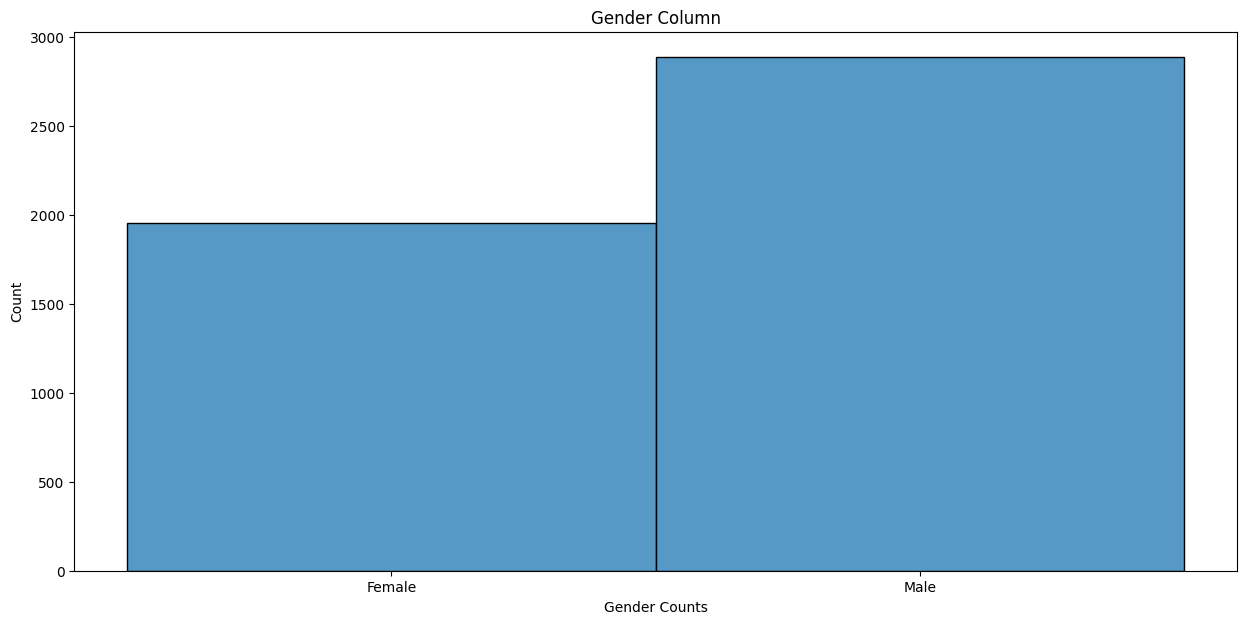

In [123]:
#Figuring out the distribution of gender
data['Gender'] = data.apply(lambda row: 'Male' if row['Gender_Male'] == 1 else 'Female', axis=1)

# Plotting the histogram with the corrected data
plt.figure(figsize=(15,7))
v2_gender = sns.histplot(data=data, x='Gender')
v2_gender.set_title('Gender Column', color='black')
plt.xlabel('Gender Counts', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

In [124]:
# Filtering data for males and females
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Calculating churn rate
male_churn_rate = male_data['Churn'].mean()
female_churn_rate = female_data['Churn'].mean()

male_churn_rate, female_churn_rate

(np.float64(0.16210599237963283), np.float64(0.13074565883554648))



> ***Approximately 16,21% of male customers churned and yet only 13,07% on female customers were churned***



In [127]:
#Further Analysis on the Gender behaviour
male_data['HourSpendOnApp'].describe()

,HourSpendOnApp
count,2887.000000
mean,2.980256
std,0.709278
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,4.000000


In [128]:
female_data['HourSpendOnApp'].describe()

,HourSpendOnApp
count,1958.000000
mean,2.984678
std,0.730229
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,4.000000




> ***Females and Males spend almost the same number of hours on app***



In [129]:
# Summing up the preferred payment mode columns for female customers
payment_modes = ['PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card',
                 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
                 'PreferredPaymentMode_UPI']

# Creating a subset of data for female customers
male_cst = data['Gender'] == 'Male'
female_data = data[~male_cst]

# Calculating the sum for each payment mode
female_payment_mode_sums = female_data[payment_modes].sum()
female_payment_mode_sums

,0
PreferredPaymentMode_Cash on Delivery,174
PreferredPaymentMode_Credit Card,631
PreferredPaymentMode_Debit Card,786
PreferredPaymentMode_E wallet,251
PreferredPaymentMode_UPI,116


In [130]:
# Calculating the sum for each payment mode for male customers
male_payment_mode_sums = male_data[payment_modes].sum()
male_payment_mode_sums

,0
PreferredPaymentMode_Cash on Delivery,251
PreferredPaymentMode_Credit Card,894
PreferredPaymentMode_Debit Card,1182
PreferredPaymentMode_E wallet,323
PreferredPaymentMode_UPI,237





> **Both genders have the same preferred payment mode**



In [131]:

# Identifying the columns for preferred order category
order_cat_columns = [col for col in data.columns if 'PreferedOrderCat_' in col]

# Creating a subset of data for male customers
male_order_data = data[male_cst][order_cat_columns]

# Calculating the sum for each order category for male customers
male_order_cat_sums = male_order_data.sum()

male_order_cat_sums

,0
PreferedOrderCat_Fashion,471
PreferedOrderCat_Grocery,212
PreferedOrderCat_Laptop & Accessory,1173
PreferedOrderCat_Mobile Phone,853
PreferedOrderCat_Others,178


In [132]:
# Creating a subset of data for female customers
female_order_data = data[~male_cst][order_cat_columns]

# Calculating the sum for each order category for female customers
female_order_cat_sums = female_order_data.sum()

female_order_cat_sums

,0
PreferedOrderCat_Fashion,352
PreferedOrderCat_Grocery,196
PreferedOrderCat_Laptop & Accessory,835
PreferedOrderCat_Mobile Phone,489
PreferedOrderCat_Others,86




> **Both gender do have the same categories of interest **




In [133]:
OnlineRetail_V2['OrderCount'][male_cst].describe()

,OrderCount
count,2887.000000
mean,3.150849
std,2.943646
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,16.000000


In [134]:
OnlineRetail_V2['OrderCount'][~male_cst].describe()

,OrderCount
count,1958.000000
mean,3.321757
std,3.098481
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,16.000000


In [135]:
#Total number of males orders
OnlineRetail_V2['OrderCount'][male_cst].sum()

np.float64(9096.5)

In [136]:

#Total number of females' orders
OnlineRetail_V2['OrderCount'][~male_cst].sum()

np.float64(6504.0)

In [137]:
# Summing up the total orders for males and females
total_orders_male = male_data['OrderCount'].sum()
total_orders_female = female_data['OrderCount'].sum()

# Counting the number of male and female customers
total_males = male_data['CustomerID'].nunique()
total_females = female_data['CustomerID'].nunique()

# Calculating the average order per person for males and females
average_order_per_male = total_orders_male / total_males
average_order_per_female = total_orders_female / total_females

average_order_per_male, average_order_per_female

(np.float64(3.150848631797714), np.float64(3.3217568947906027))



> ***Although female customers are less than male customers but on average a female customer tends to have an average of 3.3397 order versus 3.1601 per male***



In [138]:
OnlineRetail_V2['CashbackAmount'][male_cst].describe()

,CashbackAmount
count,2887.000000
mean,184.945618
std,48.307101
min,0.000000
25%,151.000000
50%,168.000000
75%,204.000000
max,325.000000


In [139]:
OnlineRetail_V2['CashbackAmount'][~male_cst].describe()

,CashbackAmount
count,1958.000000
mean,186.447395
std,47.232300
min,0.000000
25%,152.000000
50%,171.000000
75%,206.750000
max,325.000000


In [140]:
#Total cashback amount of males
round(OnlineRetail_V2['CashbackAmount'][male_cst].sum(),2)

np.int64(533938)

In [141]:

#Total cashback amount of females
round(OnlineRetail_V2['CashbackAmount'][~male_cst].sum(),2)

np.int64(365064)

***Males have the share of the lion when it comes to the cash-back amount***


## **Q3) Provide key insights on why our customers churn and possible churn indicators**

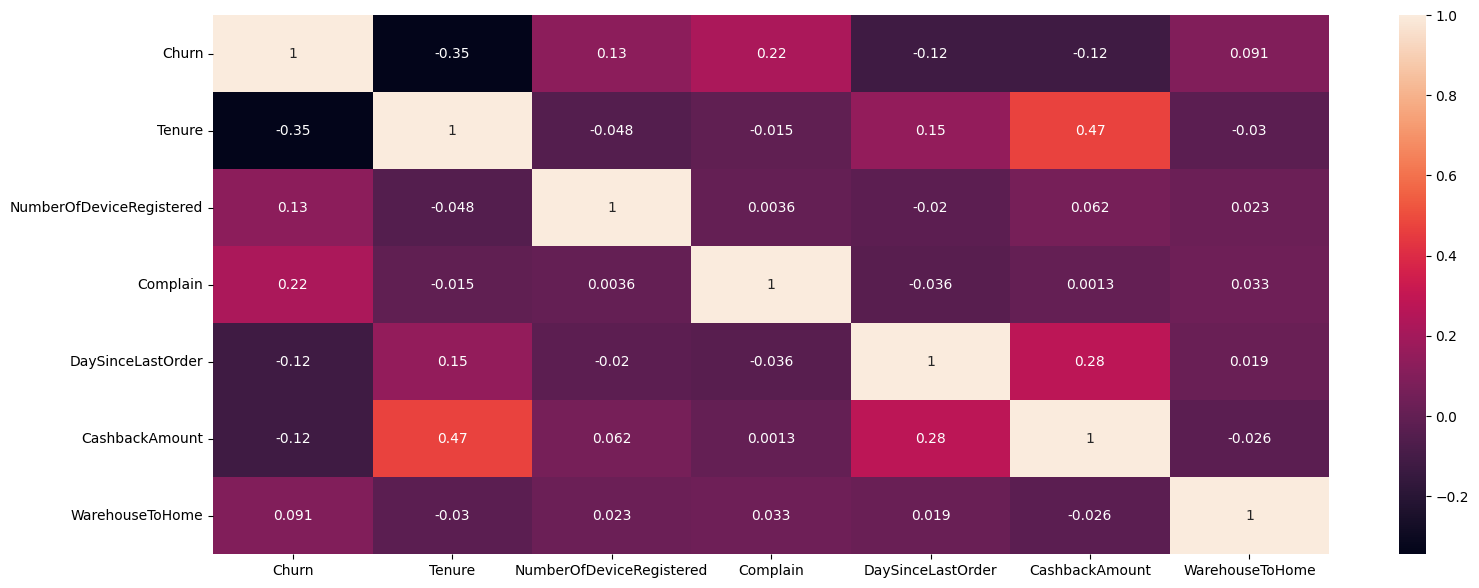

In [142]:
OnlineRetail_Subset = OnlineRetail_V2[['Churn','Tenure','NumberOfDeviceRegistered','Complain','DaySinceLastOrder','CashbackAmount','WarehouseToHome']]
#Let's figure out the correlation between churn and other columns
plt.figure(figsize=(18,7))
sns.heatmap(data = OnlineRetail_Subset.corr(), annot=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

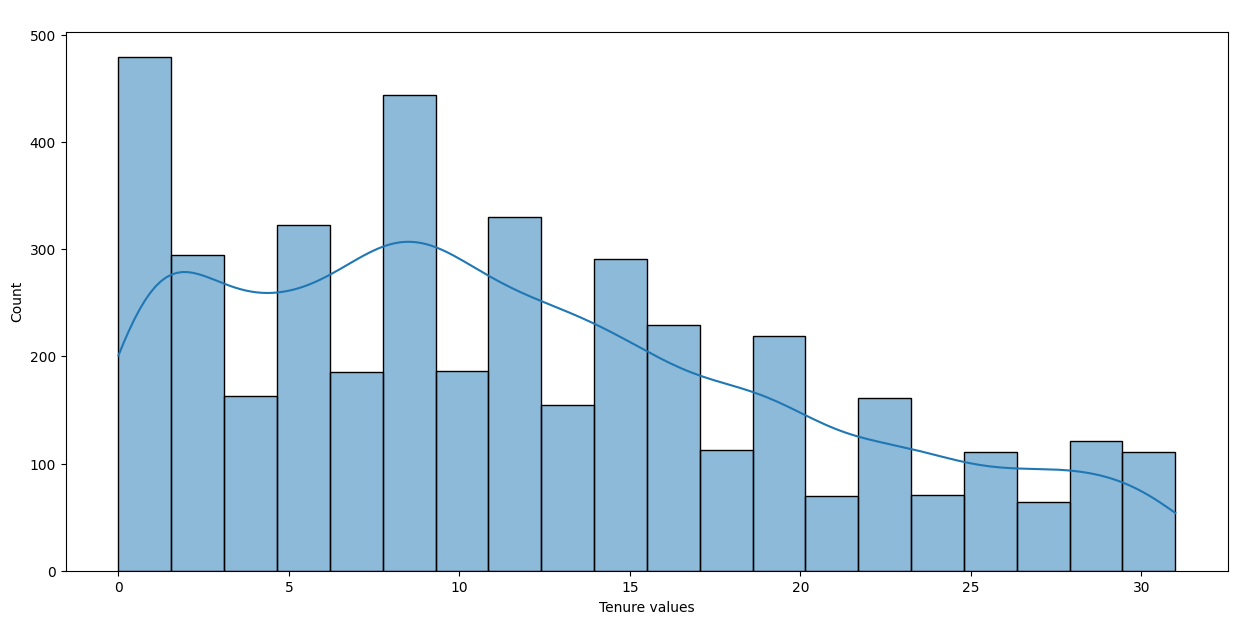

In [143]:

#Figuring out the distribution tenure values for not churned customers to compare it with the distribution of churned customers
plt.figure(figsize=(15,7))
v2_tenure_not_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['Tenure'][~Churned],kde=True)
v2_tenure_not_churned.set_title('Tenure Column (Not Churned) Distribution',color= 'white')
plt.xlabel('Tenure values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

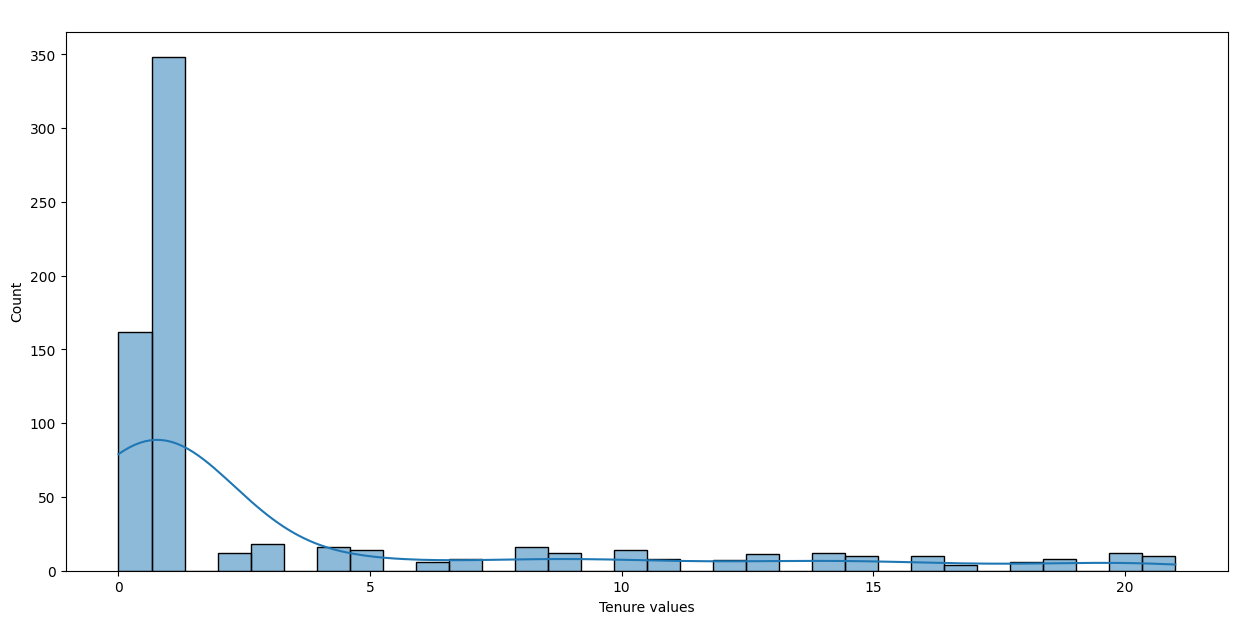

In [144]:
#Figuring out the distribution tenure values for churned customers
plt.figure(figsize=(15,7))
v2_tenure_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['Tenure'][Churned],kde=True)
v2_tenure_churned.set_title('Tenure Column (Churned) Distribution',color= 'white')
plt.xlabel('Tenure values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

In [145]:
#Checking the average tenure for a churned customer
round(OnlineRetail_V2['Tenure'][Churned].mean(),2)

np.float64(3.59)

In [146]:

#Checking the average tenure for a current customer
round(OnlineRetail_V2['Tenure'][~Churned].mean(),2)

np.float64(11.81)



> ***Tenure is the first churn indicator, The average tenure of churned customer is 3.59 vs 11.81 for not churned customers, Hence, We should pay more attention to our new customers especially in their first 3.59 tenure period, In conclusion, the higher the tenure the higher the loyality the less churn possibility***



In [147]:
#Further Analysis
OnlineRetail_V2['Complain'][Churned].value_counts()

,count
Complain,
1,380
0,344


In [148]:
OnlineRetail_V2['Complain'][~Churned].value_counts()

,count
Complain,
0,3125
1,996


In [149]:
OnlineRetail_V2['Complain'].value_counts()

,count
Complain,
0,3469
1,1376




> ***Approximately 50% of the churned customers complained and hence we should pay attention to complains as it is the 2nd churn ***



## **Q4) Analyze the distance between the warehouse and the customer's home and check if it relates to complains?**

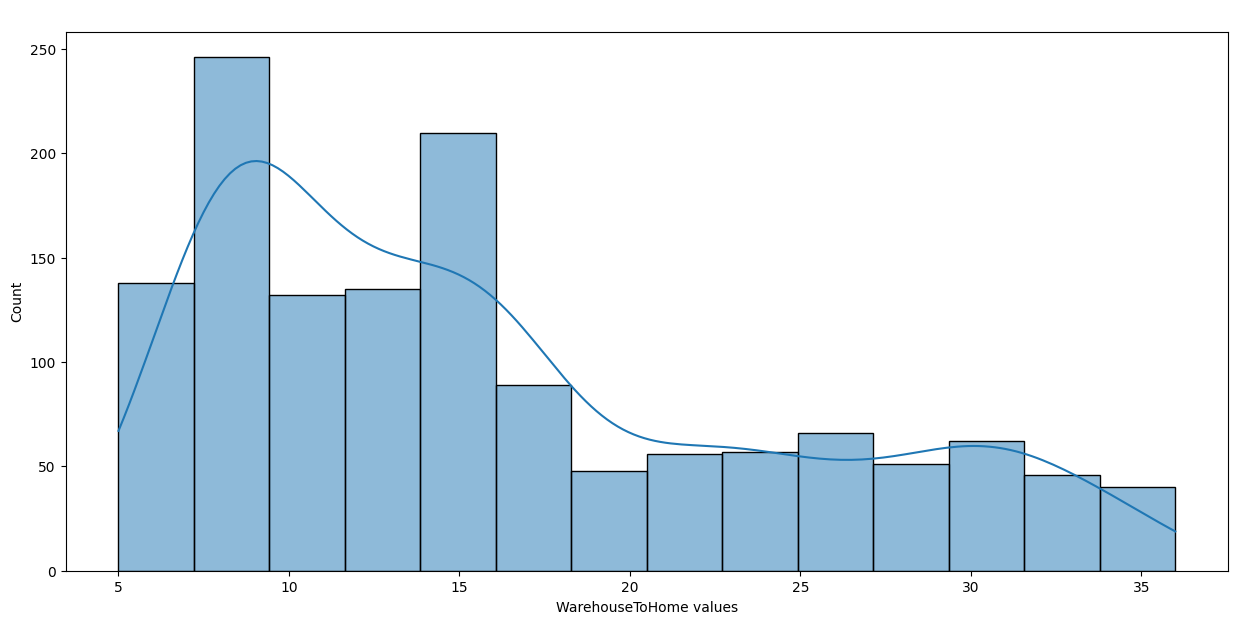

In [150]:
#Figuring out the distribution of WarehouseToHome values for current complaining customers
plt.figure(figsize=(15,7))
v2_warehouse_complain = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['WarehouseToHome'][OnlineRetail_V2['Complain']==1], kde=True)
v2_warehouse_complain.set_title('WarehouseToHome and Complained Distribution',color= 'white')
plt.xlabel('WarehouseToHome values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

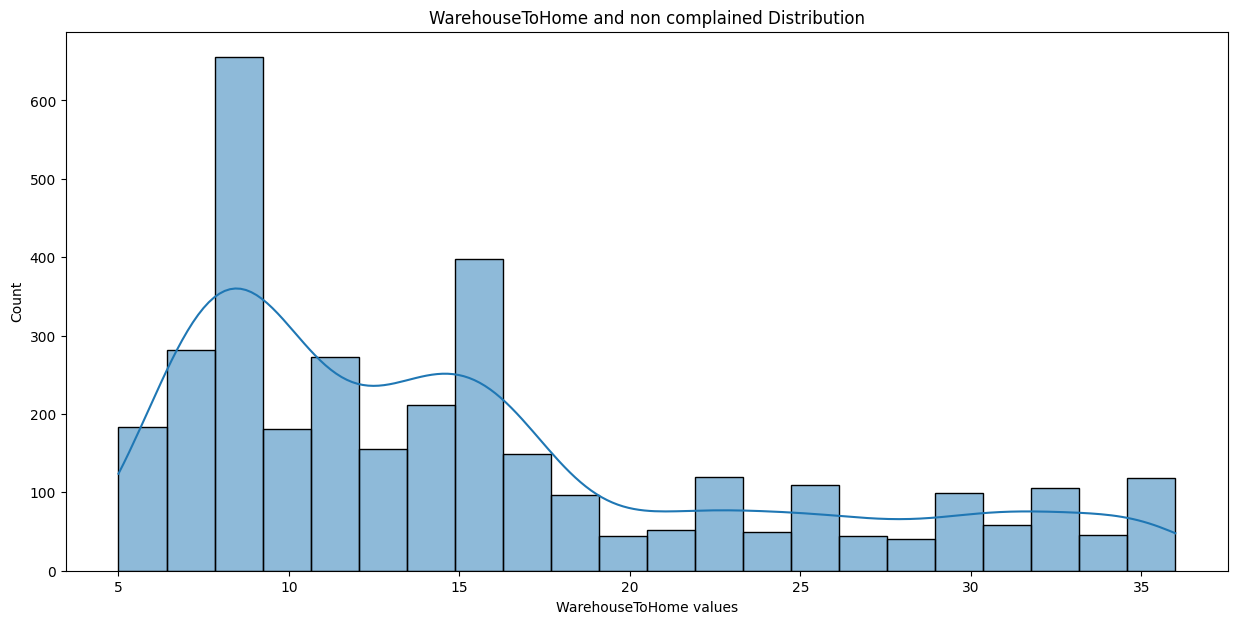

In [151]:
#Figuring out the distribution of WarehouseToHome values for current non-complaining customers
plt.figure(figsize=(15,7))
v2_warehouse_complain = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['WarehouseToHome'][OnlineRetail_V2['Complain']==0], kde=True)
v2_warehouse_complain.set_title('WarehouseToHome and non complained Distribution',color= 'black')
plt.xlabel('WarehouseToHome values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

In [152]:
OnlineRetail_V2['WarehouseToHome'].describe()

,WarehouseToHome
count,4845.000000
mean,15.708772
std,8.309979
min,5.000000
25%,9.000000
50%,14.000000
75%,21.000000
max,36.000000


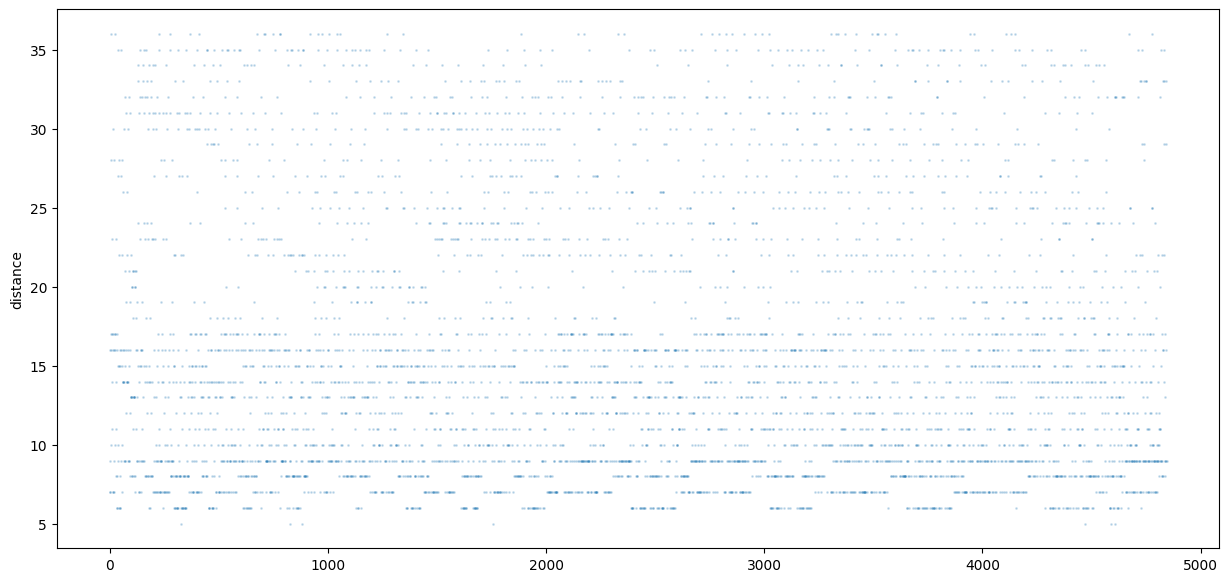

In [153]:
#checking the distribution and density of the distance between customers and our warhouses
plt.figure(figsize=(15,7))
plt.plot(OnlineRetail_V2['WarehouseToHome'], 'o', markersize=1, alpha=0.2)
plt.ylabel('distance', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()




> ***The majority of the customers are in the distance between 5 to 35 kms from warehouse and hence there's no relation between complains and warehouse to home distance***



## **Q5) Does the number of addresses added by customers impact the churn rate?**

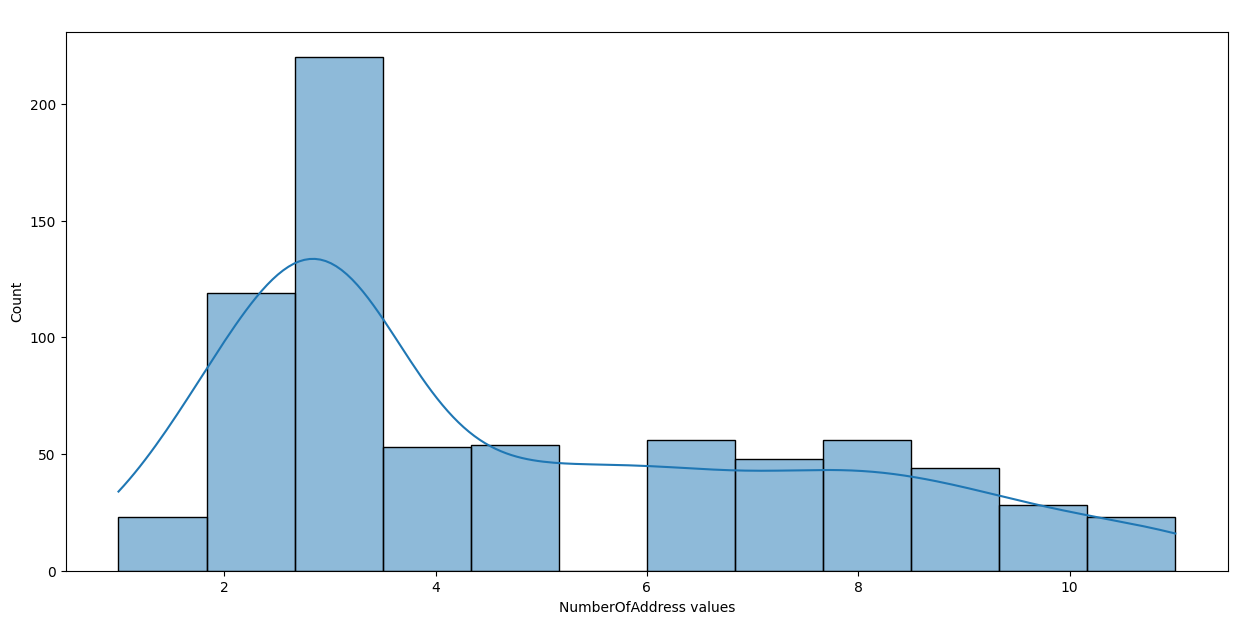

In [154]:
#checking if there any relation between number of addresses and churn
plt.figure(figsize=(15,7))
v2_numberofaddress_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['NumberOfAddress'][Churned],kde=True)
v2_numberofaddress_churned.set_title('NumberOfAddress Churned Distribution',color= 'white')
plt.xlabel('NumberOfAddress values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

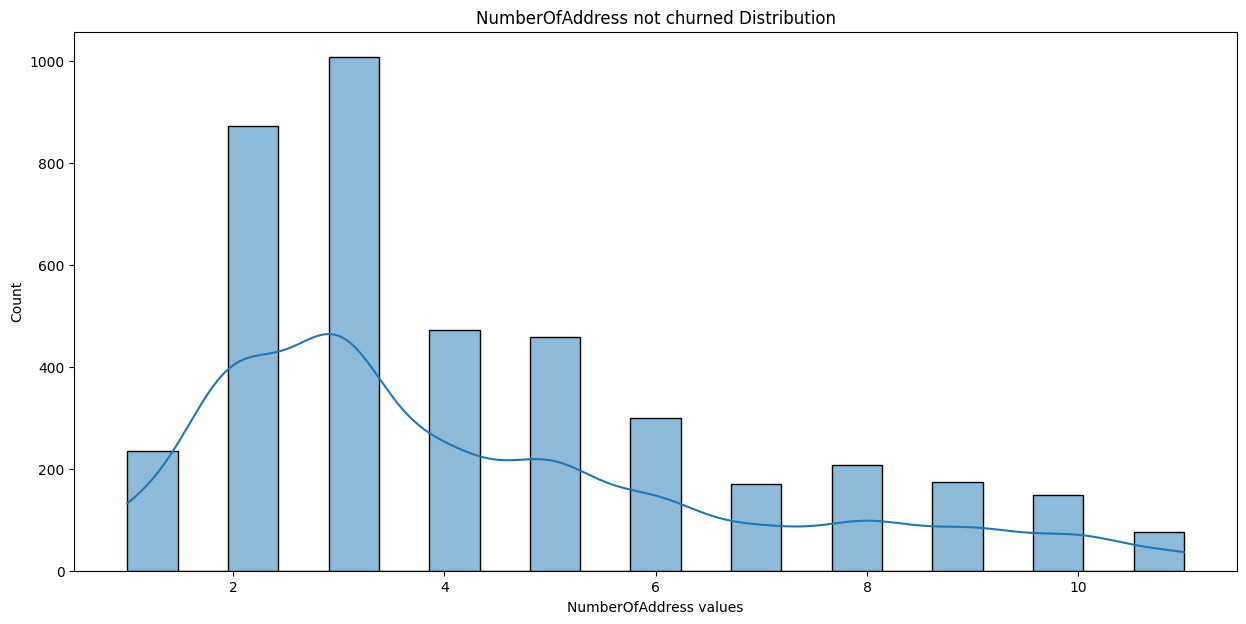

In [155]:
#checking if there any relation between number of addresses and churn
plt.figure(figsize=(15,7))
v2_numberofaddress_not_churned = sns.histplot(data = OnlineRetail_V2, x = OnlineRetail_V2['NumberOfAddress'][~Churned],kde=True)
v2_numberofaddress_not_churned.set_title('NumberOfAddress not churned Distribution',color= 'black')
plt.xlabel('NumberOfAddress values', color='black')
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.show()

In [156]:
OnlineRetail_V2['NumberOfAddress'][Churned].describe()

,NumberOfAddress
count,724.000000
mean,4.767956
std,2.711845
min,1.000000
25%,3.000000
50%,3.500000
75%,7.000000
max,11.000000


In [157]:
OnlineRetail_V2['NumberOfAddress'][~Churned].describe()

,NumberOfAddress
count,4121.000000
mean,4.299442
std,2.518884
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,11.000000




> ***In terms of Number of addresses for churned and not churned customers, There's in fact no difference and hence the number of addresses doesn't have an impact on the churn rate***


---




# **Actionable Recommendations:**

- Follow up the customers within 3-6 days since their last order to reduce the churn rate, AS approximately 50% of customers churn after 3 days of their last order, And approximately 75% churn after 6 days of their last order.  

- Offer promos for credit and debit card holders, as they represent the most frequently used payment method for customers whether they’re males or females.  

- Upsell a specific category of items which is Laptop & Accessory as the highest number of sales was directed toward that category by males and females.  

- Initiate a cash back system on debit and credit card as customers with high cash back percentage tend to not churn.  

- Enhance the complain handling department as 50% of churned customer has already complained before they churn.  

# **INSIGHTS**

1. Tenure is the most influential factor in customer churn.

 Customers with longer subscription periods (higher tenure) are less likely to churn. This highlights the importance of focusing on long-term customer retention strategies.

2. Cashback amount is the second most influential factor.

 Customers receiving higher cashback tend to have a lower potential for churn.

3. WarehouseToHome plays a significant role in churn prediction.

A higher WarehouseToHome value, which measures the distance from the warehouse to the customer's home, correlates with an increased risk of churn. This suggests that long delivery distances could negatively affect customer experience, emphasizing the need for optimizing logistics and delivery efficiency.

4. DaySinceLastOrder shows that the longer customers go without placing an order, the higher the risk of churn. This indicates the need for retention strategies for long-inactive customers.

5. Complain also have a considerable influence.

Customers who lodge complaints are at a higher risk of churning, emphasizing the importance of resolving customer issues efficiently and effectively.

6. SatisfactionScore has a positive influence, where higher satisfaction scores reduce the likelihood of churn.

7. Product category preference (PreferredOrderCat) has a relatively small influence, but remains relevant in predicting churn.

8. Demographic factors such as MaritalStatus have a moderate influence, with single status slightly increasing the risk of churn compared to married status.

# **RECOMMENDATION**

**1. Implement a Robust Loyalty Program**

Key Feature: Tenure

Our analysis shows that "Tenure" is the most important feature in predicting
customer churn. A well-designed loyalty program can significantly increase customer tenure.
- Develop a tiered loyalty program that rewards long-term customers
- Offer exclusive benefits, early access to sales, or personalized discounts based on tenure
- Implement a points system that encourages frequent purchases and long-term engagement  

**2. Enhance Customer Service and Complaint Resolution**

Key Feature: Complain

The "Complain" feature is the second most important, highlighting the critical role of effective complaint handling and customer service.
- Invest in training for customer service representatives to handle complaints efficiently
- Implement a streamlined process for quick complaint resolution
- Regularly analyze complaint data to identify and address recurring issues  

**3. Personalize Customer Experience**

Key Features: NumberOfAddress, NumberOfDeviceRegistered

The high importance of "NumberOfAddress" and "NumberOfDeviceRegistered" suggests that personalization based on customer behavior is crucial.

- Utilize data on multiple delivery addresses and devices to create tailored shopping experiences
- Implement AI-driven product recommendations based on browsing and purchase history
- Develop targeted marketing campaigns for different customer segments

**4. Optimize Pricing and Cashback Strategies**  
Key Feature: CashbackAmount

The significance of "CashbackAmount" indicates that financial incentives play a vital role in customer retention.

- Analyze the effectiveness of current cashback offerings and adjust as needed
- Implement dynamic pricing strategies based on customer segments and purchase history
- Consider bundled pricing or subscription models for frequently purchased items

**5. Improve Product Availability and Delivery Efficiency**

Key Features: DaySinceLastOrder, WarehouseToHome

The importance of "DaySinceLastOrder" and "WarehouseToHome" highlights the need for efficient inventory management and delivery processes.

- Optimize inventory levels to ensure product availability and reduce stockouts
- Improve logistics to decrease delivery times and enhance the "WarehouseToHome" experience
- Implement predictive analytics for demand forecasting and inventory management